In [2]:
# import modules
import pandas as pd
import numpy as np
#!conda install -y plotly
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)

In [2]:
# read files
toxicity_comments = pd.read_csv('/mnt/d/Advanced Project/toxicity_annotated_comments.tsv', sep = '\t', index_col = 0)
toxicity_annotations = pd.read_csv('/mnt/d/Advanced Project/toxicity_annotations.tsv',  sep = '\t')
toxicity_demographics = pd.read_csv('/mnt/d/Advanced Project/toxicity_worker_demographics.tsv', sep = '\t')
attack_comments = pd.read_csv('/mnt/d/Advanced Project/attack_annotated_comments.tsv', sep = '\t', index_col = 0)
attack_annotations = pd.read_csv('/mnt/d/Advanced Project/attack_annotations.tsv',  sep = '\t')
attack_demographics = pd.read_csv('/mnt/d/Advanced Project/attack_worker_demographics.tsv', sep = '\t')
aggression_comments = pd.read_csv('/mnt/d/Advanced Project/aggression_annotated_comments.tsv', sep = '\t', index_col = 0)
aggression_annotations = pd.read_csv('/mnt/d/Advanced Project/aggression_annotations.tsv',  sep = '\t')
aggression_demographics = pd.read_csv('/mnt/d/Advanced Project/aggression_worker_demographics.tsv', sep = '\t')

In [3]:
display (toxicity_comments.head(5))

comment  year  logged_in  \
rev_id                                                                        
2232.0   This:NEWLINE_TOKEN:One can make an analogy in ...  2002       True   
4216.0   `NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...  2002       True   
8953.0                           Elected or Electoral? JHK  2002      False   
26547.0  `This is such a fun entry.   DevotchkaNEWLINE_...  2002       True   
28959.0  Please relate the ozone hole to increases in c...  2002       True   

              ns  sample  split  
rev_id                           
2232.0   article  random  train  
4216.0      user  random  train  
8953.0   article  random   test  
26547.0  article  random  train  
28959.0  article  random   test

In [4]:
display (toxicity_annotations.head(5))

rev_id  worker_id  toxicity  toxicity_score
0  2232.0        723         0             0.0
1  2232.0       4000         0             0.0
2  2232.0       3989         0             1.0
3  2232.0       3341         0             0.0
4  2232.0       1574         0             1.0

In [5]:
display (toxicity_demographics.head())

worker_id  gender  english_first_language age_group  education
0         85  female                       0     18-30  bachelors
1       1617  female                       0     45-60  bachelors
2       1394  female                       0       NaN  bachelors
3        311    male                       0     30-45  bachelors
4       1980    male                       0     45-60    masters

In [6]:
# joining datasets
toxicity = toxicity_comments.merge(toxicity_annotations, how ='outer', on="rev_id")
toxicity = toxicity.merge(toxicity_demographics, how ='outer', on="worker_id").sort_values(by=['rev_id','worker_id'])
attacks = attack_comments.merge(attack_annotations, how ='outer', on="rev_id")
attacks = attacks.merge(attack_demographics, how ='outer', on="worker_id").sort_values(by=['rev_id','worker_id'])
aggression = aggression_comments.merge(aggression_annotations, how ='outer', on="rev_id")
aggression = aggression.merge(aggression_demographics, how ='outer', on="worker_id").sort_values(by=['rev_id','worker_id'])

In [7]:
display (toxicity.head(5))

rev_id                                            comment  year  \
3467  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
3039  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
0     2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
2600  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   
2169  2232.0  This:NEWLINE_TOKEN:One can make an analogy in ...  2002   

      logged_in       ns  sample  split  worker_id  toxicity  toxicity_score  \
3467       True  article  random  train        405         0             1.0   
3039       True  article  random  train        680         0             0.0   
0          True  article  random  train        723         0             0.0   
2600       True  article  random  train        772         0             1.0   
2169       True  article  random  train       1508         0             1.0   

      gender  english_first_language age_group  education  
3467    male                     0.0     30-45    masters  
3039    male                     0.0     18-30    masters  
0     female                     0.0     30-45  bachelors  
2600    male                     0.0     18-30  bachelors  
2169  female                     1.0     45-60         hs

In [66]:
# merging attack and toxic datasets
demos = attack_annotations.merge(attack_demographics,how='outer',on='worker_id')
demos = demos.merge(aggression_annotations,how='inner',on=['worker_id','rev_id'])
df = toxicity_annotations.merge(toxicity_demographics,how='outer',on='worker_id')
demos = demos.append(df,ignore_index=True).sort_values(by=['rev_id','worker_id'])
df = demos[['rev_id','attack','aggression','toxicity']]
s = df.groupby('rev_id')['attack'].count()
new_df = pd.DataFrame({'rev_id':s.index, 'count_attack':s.values})
s = df.groupby('rev_id')['aggression'].count()
new_df['count_agg'] = s.values
s = df.groupby('rev_id')['toxicity'].count()
new_df['count_toxic'] = s.values
attack_df = new_df[(new_df.count_attack>0) & (new_df.count_toxic<1)]
new_df = new_df[(new_df.count_attack>0) & (new_df.count_toxic>0)]
overlap = demos.merge(new_df,how='inner',on='rev_id')
display (overlap.head(10))

rev_id  worker_id  quoting_attack  recipient_attack  third_party_attack  \
0  37675.0        148             NaN               NaN                 NaN   
1  37675.0        170             0.0               0.0                 0.0   
2  37675.0        176             0.0               0.0                 0.0   
3  37675.0        240             NaN               NaN                 NaN   
4  37675.0        403             NaN               NaN                 NaN   
5  37675.0        481             0.0               0.0                 0.0   
6  37675.0        487             0.0               0.0                 0.0   
7  37675.0        578             0.0               0.0                 0.0   
8  37675.0        653             NaN               NaN                 NaN   
9  37675.0        833             NaN               NaN                 NaN   

   other_attack  attack  gender  english_first_language age_group  \
0           NaN     NaN    male                     1.0     18-30   
1           0.0     0.0     NaN                     NaN       NaN   
2           0.0     0.0    male                     0.0     18-30   
3           NaN     NaN    male                     0.0     18-30   
4           NaN     NaN    male                     0.0     18-30   
5           0.0     0.0  female                     0.0     18-30   
6           0.0     0.0  female                     0.0     18-30   
7           0.0     0.0  female                     0.0     30-45   
8           NaN     NaN    male                     0.0     18-30   
9           NaN     NaN    male                     0.0     18-30   

      education  aggression  aggression_score  toxicity  toxicity_score  \
0     bachelors         NaN               NaN       0.0             0.0   
1           NaN         0.0               0.0       NaN             NaN   
2            hs         0.0               0.0       NaN             NaN   
3  professional         NaN               NaN       0.0             0.0   
4     bachelors         NaN               NaN       0.0             1.0   
5            hs         0.0               0.0       NaN             NaN   
6       masters         0.0               0.0       NaN             NaN   
7            hs         0.0               0.0       NaN             NaN   
8     bachelors         NaN               NaN       1.0            -1.0   
9            hs         NaN               NaN       0.0             1.0   

   count_attack  count_agg  count_toxic  
0            10         10           10  
1            10         10           10  
2            10         10           10  
3            10         10           10  
4            10         10           10  
5            10         10           10  
6            10         10           10  
7            10         10           10  
8            10         10           10  
9            10         10           10

In [55]:
# get mean attack/aggressiveness/toxicity values
s = overlap.groupby('rev_id')['attack'].mean()
means = pd.DataFrame({'rev_id':s.index, 'mean_attack':s.values})
s = overlap.groupby('rev_id')['aggression_score'].mean()
means['mean_agg'] = s.values
s = overlap.groupby('rev_id')['toxicity_score'].mean()
means['mean_tox'] = s.values
display(means)

rev_id  mean_attack  mean_agg  mean_tox
0          37675.0     0.000000  0.000000       0.3
1         297866.0     0.000000  0.111111       0.2
2         360594.0     0.000000  0.000000       0.4
3         377054.0     0.000000  0.000000       0.4
4         661509.0     0.111111  0.111111       0.2
...            ...          ...       ...       ...
77967  699848324.0     0.111111 -0.222222       0.4
77968  699851288.0     0.100000  0.100000       0.4
77969  699857133.0     0.000000  0.111111       0.5
77970  699891012.0     0.200000 -0.500000      -0.1
77971  699897151.0     0.000000  0.000000       0.4

[77972 rows x 4 columns]

In [61]:
# plots for overlapping datasets

# fig = go.Figure(data=go.Scatter(x=means['mean_attack'], y=means['mean_tox'], mode='markers'))
# fig.update_layout(
#     title="Likelihood of being an attack vs toxicity score",
#     xaxis_title="Proportion of annotators who indicated attack present",
#     yaxis_title="Average toxicity scores of annotators (2 healthy, -2 toxic)")
# fig.show()

# fig = go.Figure(data=go.Scatter(x=means['mean_agg'], y=means['mean_tox'], mode='markers'))
# fig.update_layout(
#     title="Average aggression score vs average toxicity score",
#     xaxis_title="Average aggression scores of annotators (2 healthy, -2 toxic)",
#     yaxis_title="Average toxicity scores of annotators (2 healthy, -2 toxic)")
# fig.show()

# fig = go.Figure(data=go.Scatter(x=means['mean_attack'], y=means['mean_agg'], mode='markers'))
# fig.update_layout(
#     title="Likelihood of being an attack vs average aggression score",
#     xaxis_title="Proportion of annotators who indicated attack present",
#     yaxis_title="Average aggression scores of annotators (2 healthy, -2 toxic)")
# fig.show()

In [103]:
# find how many attacks are actually attacks/aggressive + how many of those overlap with toxicity
df = attack_annotations.merge(aggression_annotations,how='inner',on=['worker_id','rev_id'])
df2 = df.merge(attack_df['rev_id'],how='inner',on='rev_id')
s = df2.groupby('rev_id')['aggression_score'].mean()
mean_aggressiveness = pd.DataFrame({'rev_id':s.index, 'mean_aggr':s.values})
mean_aggressiveness = mean_aggressiveness[mean_aggressiveness['mean_aggr'] < -0.5]
display(mean_aggressiveness)

rev_id  mean_aggr
53        801279  -0.777778
99       1319467  -0.600000
110      1450441  -1.000000
188      2702703  -2.777778
215      3148037  -0.550000
...          ...        ...
37663  692971291  -2.200000
37731  694371957  -1.666667
37739  694454387  -2.555556
37771  695689706  -1.807692
37874  699257991  -1.100000

[1343 rows x 2 columns]

In [133]:
toxicity_comments['comment'] = toxicity_comments['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
toxicity_comments['comment'] = toxicity_comments['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))
s = toxicity_comments['comment'].str.len().mean()
print(s)

400.7708502937014


In [ ]:
# toxicity stats
print("Toxicity")
print("no. annotations:",len(toxicity))
print("no. comments:",toxicity['rev_id'].nunique())
print("no. annotators:",toxicity['worker_id'].nunique())
print("average no. annotations per annotator:","{:.2f}".format(len(toxicity)/toxicity['worker_id'].nunique()))
print("average no. annotations per comment:","{:.2f}".format(len(toxicity)/toxicity['rev_id'].nunique()))

s1 = toxicity.groupby('rev_id')['worker_id'].count()
df1 = pd.DataFrame({'rev_ids':s1.index, 'worker_counts':s1.values})
s = df1.worker_counts.value_counts()
df = pd.DataFrame({'worker_counts':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.worker_counts, y=df.counts)])
fig.update_layout(title_text="Distribution of number of annotations per comment", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.toxicity==1].groupby('rev_id')['toxicity'].count()
s2 = toxicity[toxicity.toxicity==0].groupby('rev_id')['toxicity'].count()
df1 = pd.DataFrame({'rev_ids':s1.index, 'one_counts':s1.values})
df2 = pd.DataFrame({'rev_ids':s2.index, 'zero_counts':s2.values})
df1 = df1.merge(df2, how ='outer', on="rev_ids")
df1['one_counts'] = df1['one_counts'].fillna(0)
df1['zero_counts'] = df1['zero_counts'].fillna(0)
df1['perc'] = df1['one_counts']/(df1['zero_counts']+df1['one_counts'])*100
s = df1.perc.value_counts()
df = pd.DataFrame({'percs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.percs, y=df.counts)])
fig.update_layout(title_text="Distribution of percentage toxic ratings per comment", title_x=0.5)
fig.show()

s = toxicity_comments.year.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of years in comments", title_x=0.5)
fig.show()

s = toxicity_comments.logged_in.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of logged in users in comments", title_x=0.5)
fig.show()

s = toxicity_comments.ns.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of article types in comments", title_x=0.5)
fig.show()

toxicity_comments = toxicity_comments.rename(columns={"sample": "sample_type"})
s = toxicity_comments.sample_type.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Distribution of sample type comments extracted from", title_x=0.5)
fig.show()

s = toxicity.toxicity.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations labelled toxic", title_x=0.5)
fig.show()

s = toxicity.toxicity_score.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations by toxicity scores", title_x=0.5)
fig.show()

s = toxicity_demographics.gender.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators of each gender", title_x=0.5)
fig.show()

s = toxicity.gender.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by each gender", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.gender=='female'].toxicity_score.value_counts()
s2 = toxicity[toxicity.gender=='male'].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df2.counts))
fig = go.Figure(data=[
    go.Bar(name='female', x=df1.scores, y=df1.counts),
    go.Bar(name='male', x=df2.scores, y=df2.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by gender")
fig.show()

print("\n mean annotations that are given toxic rating by gender")
print(toxicity.groupby('gender')['toxicity'].mean())

print("\n mean toxicity score given by gender")
print(toxicity.groupby('gender')['toxicity_score'].mean())

print("\n mean no. annotations for female annotator")
print("{:.2f}".format(toxicity[toxicity.gender == "female"].groupby('worker_id')['rev_id'].count().mean()))

print("\n mean no. annotations for male annotator")
print("{:.2f}".format(toxicity[toxicity.gender == "male"].groupby('worker_id')['rev_id'].count().mean()))

s = toxicity_demographics.english_first_language.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators with English as their first language", title_x=0.5)
fig.show()

s = toxicity.english_first_language.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by annotators with English as their first language", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.english_first_language==0].toxicity_score.value_counts()
s2 = toxicity[toxicity.english_first_language==1].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df2.counts))
fig = go.Figure(data=[
    go.Bar(name='1st language not English', x=df1.scores, y=df1.counts),
    go.Bar(name='1st language English', x=df2.scores, y=df2.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by language")
fig.show()

print("\n mean annotations given toxic rating by language")
print(toxicity.groupby('english_first_language')['toxicity'].mean())

print("\n mean toxicity score given by language")
print(toxicity.groupby('english_first_language')['toxicity_score'].mean())

print("\n mean no. annotations for English 1st language annotator")
print("{:.2f}".format(toxicity[toxicity.english_first_language==1].groupby('worker_id')['rev_id'].count().mean()))

print("\n mean no. annotations for not English 1st language annotator")
print("{:.2f}".format(toxicity[toxicity.english_first_language==0].groupby('worker_id')['rev_id'].count().mean()))

s = toxicity_demographics.age_group.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators by age group", title_x=0.5)
fig.show()

s = toxicity.age_group.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by each age group", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.age_group=="Under 18"].toxicity_score.value_counts()
s2 = toxicity[toxicity.age_group=="18-30"].toxicity_score.value_counts()
s3 = toxicity[toxicity.age_group=="30-45"].toxicity_score.value_counts()
s4 = toxicity[toxicity.age_group=="45-60"].toxicity_score.value_counts()
s5 = toxicity[toxicity.age_group=="Over 60"].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df3 = pd.DataFrame({'scores':s3.index, 'counts':s3.values})
df4 = pd.DataFrame({'scores':s4.index, 'counts':s4.values})
df5 = pd.DataFrame({'scores':s5.index, 'counts':s5.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df5.counts))
df2['counts'] = df2['counts'].div(sum(df2.counts)/sum(df5.counts))
df3['counts'] = df3['counts'].div(sum(df3.counts)/sum(df5.counts))
df4['counts'] = df4['counts'].div(sum(df4.counts)/sum(df5.counts))
fig = go.Figure(data=[
    go.Bar(name='< 18', x=df1.scores, y=df1.counts),
    go.Bar(name='18-30', x=df2.scores, y=df2.counts),
    go.Bar(name='30-45', x=df3.scores, y=df3.counts),
    go.Bar(name='45-60', x=df4.scores, y=df4.counts),
    go.Bar(name='> 60', x=df5.scores, y=df5.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by Age Group")
fig.show()

print("\n mean annotations given toxic rating by age group")
print(toxicity.groupby('age_group')['toxicity'].mean())

print("\n mean toxicity score given by age group")
print(toxicity.groupby('age_group')['toxicity_score'].mean())

print("\n mean no. annotations for Under 18 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "Under 18"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for 18-30 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "18-30"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for 30-45 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "30-45"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for 45-60 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "45-60"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for Over 60 annotator")
print("{:.2f}".format(toxicity[toxicity.age_group == "Over 60"].groupby('worker_id')['rev_id'].count().mean()))

s = toxicity_demographics.education.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotators by education level", title_x=0.5)
fig.show()

s = toxicity.education.value_counts()
df = pd.DataFrame({'scores':s.index, 'counts':s.values})
fig = go.Figure(data=[go.Pie(labels=df.scores, values=df.counts,textinfo='label+percent')])
fig.update_layout(title_text="Percentage of annotations made by annotators at each level of education", title_x=0.5)
fig.show()

s1 = toxicity[toxicity.education=="bachelors"].toxicity_score.value_counts()
s2 = toxicity[toxicity.education=="hs"].toxicity_score.value_counts()
s3 = toxicity[toxicity.education=="masters"].toxicity_score.value_counts()
s4 = toxicity[toxicity.education=="professional"].toxicity_score.value_counts()
s5 = toxicity[toxicity.education=="some"].toxicity_score.value_counts()
s6 = toxicity[toxicity.education=="doctorate"].toxicity_score.value_counts()
s7 = toxicity[toxicity.education=="none"].toxicity_score.value_counts()
df1 = pd.DataFrame({'scores':s1.index, 'counts':s1.values})
df2 = pd.DataFrame({'scores':s2.index, 'counts':s2.values})
df3 = pd.DataFrame({'scores':s3.index, 'counts':s3.values})
df4 = pd.DataFrame({'scores':s4.index, 'counts':s4.values})
df5 = pd.DataFrame({'scores':s5.index, 'counts':s5.values})
df6 = pd.DataFrame({'scores':s6.index, 'counts':s6.values})
df7 = pd.DataFrame({'scores':s7.index, 'counts':s7.values})
df1['counts'] = df1['counts'].div(sum(df1.counts)/sum(df7.counts))
df2['counts'] = df2['counts'].div(sum(df2.counts)/sum(df7.counts))
df3['counts'] = df3['counts'].div(sum(df3.counts)/sum(df7.counts))
df4['counts'] = df4['counts'].div(sum(df4.counts)/sum(df7.counts))
df5['counts'] = df5['counts'].div(sum(df5.counts)/sum(df7.counts))
df6['counts'] = df6['counts'].div(sum(df6.counts)/sum(df7.counts))
fig = go.Figure(data=[
    go.Bar(name='bachelors', x=df1.scores, y=df1.counts),
    go.Bar(name='hs', x=df2.scores, y=df2.counts),
    go.Bar(name='masters', x=df3.scores, y=df3.counts),
    go.Bar(name='professional', x=df4.scores, y=df4.counts),
    go.Bar(name='some', x=df5.scores, y=df5.counts),
    go.Bar(name='doctorate', x=df6.scores, y=df6.counts),
    go.Bar(name='none', x=df7.scores, y=df7.counts)
])
fig.update_layout(barmode='group',title="Toxicity scores by Level of Education")
fig.show()

print("\n mean annotations given toxic rating by level of education")
print(toxicity.groupby('education')['toxicity'].mean())

print("\n mean toxicity score given by level of education")
print(toxicity.groupby('education')['toxicity_score'].mean())

print("\n mean no. annotations for Bachelors education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="bachelors"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for High School education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="hs"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for Masters education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="masters"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for Professional education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="professional"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for some education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="some"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for PhD education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="doctorate"].groupby('worker_id')['rev_id'].count().mean()))
print("\n mean no. annotations for no education annotator")
print("{:.2f}".format(toxicity[toxicity.education=="none"].groupby('worker_id')['rev_id'].count().mean()))


In [3]:
# analysing CCTK dataset
all_comments = pd.read_csv('/mnt/d/Advanced Project/all_data.csv',index_col = 'id')
all_comments = all_comments[all_comments['identity_annotator_count']>0]
print(all_comments.shape[0])
display (all_comments.head(10))

/home/liz/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


448000


comment_text  split  \
id                                                                  
627762   OH yes - Were those evil Christian Missionarie...  train   
5892815  Why is this black racist crap still on the G&M...  train   
416437                          even up here.......BLACKS!  train   
5137126  Blame men.  There's always an excuse to blame ...  train   
855753   And the woman exposing herself saying grab thi...  train   
379144   You have no business making any comments on th...  train   
377096   "Let's get the black folks and the white folks...  train   
641883   I guess the issue is people not willing to put...  train   
5218990  JackJohnson5:\n"And they say Trump supporters ...  train   
5483824  Trump could accidently push a button and Canad...  train   

                          created_date  publication_id  parent_id  article_id  \
id                                                                              
627762   2016-11-26 15:56:03.862109+00              13   627198.0      152737   
5892815  2017-09-03 23:20:08.226613+00              54        NaN      373428   
416437   2016-08-04 16:48:07.175252+00              21        NaN      143025   
5137126  2017-04-15 19:00:45.032674+00              54  5136907.0      327125   
855753   2017-01-18 01:50:57.478867+00              13   849081.0      162008   
379144   2016-07-08 04:10:41.640757+00              21   379120.0      140889   
377096   2016-07-06 16:49:00.967646+00              21        NaN      140782   
641883   2016-11-30 22:35:35.426835+00              53   641762.0      153778   
5218990  2017-05-05 14:35:02.161380+00              54  5217754.0      331991   
5483824  2017-06-27 12:17:02.721319+00              54  5482757.0      348901   

           rating  funny  wow  sad  likes  disagree  toxicity  \
id                                                              
627762   approved      0    0    0      0         0  0.800000   
5892815  rejected      0    0    0      0         0  0.757143   
416437   rejected      0    0    0      1         0  0.688525   
5137126  rejected      0    0    0      0         0  0.545455   
855753   rejected      0    0    0      0         0  0.728571   
379144   approved      0    0    0      0         0  0.594595   
377096   approved      0    0    0      2         0  0.736842   
641883   approved      1    0    1      9         1  0.764706   
5218990  approved      0    0    0      0         0  1.000000   
5483824  rejected      0    0    0      0         0  0.421875   

         severe_toxicity   obscene  sexual_explicit  identity_attack  \
id                                                                     
627762          0.000000  0.000000         0.000000         0.700000   
5892815         0.142857  0.471429         0.014286         0.614286   
416437          0.032787  0.049180         0.000000         0.639344   
5137126         0.000000  0.000000         0.000000         0.636364   
855753          0.000000  0.600000         0.628571         0.114286   
379144          0.027027  0.040541         0.000000         0.121622   
377096          0.078947  0.000000         0.013158         0.631579   
641883          0.014706  0.117647         0.000000         0.000000   
5218990         0.000000  0.000000         0.000000         0.000000   
5483824         0.031250  0.000000         0.015625         0.046875   

           insult    threat  male  female  transgender  other_gender  \
id                                                                     
627762   0.500000  0.000000   0.0     0.0          0.0           0.0   
5892815  0.642857  0.000000   0.0     0.0          0.0           0.0   
416437   0.213115  0.000000   0.0     0.0          0.0           0.0   
5137126  0.272727  0.000000   1.0     1.0          0.0           0.0   
855753   0.300000  0.000000   0.0     1.0          0.0           0.0   
379144   0.581081  0.000000   0.0     0.0          0.0           0.0   
377096   0.236842  0.2

6.389823660714286
10.355832589285715


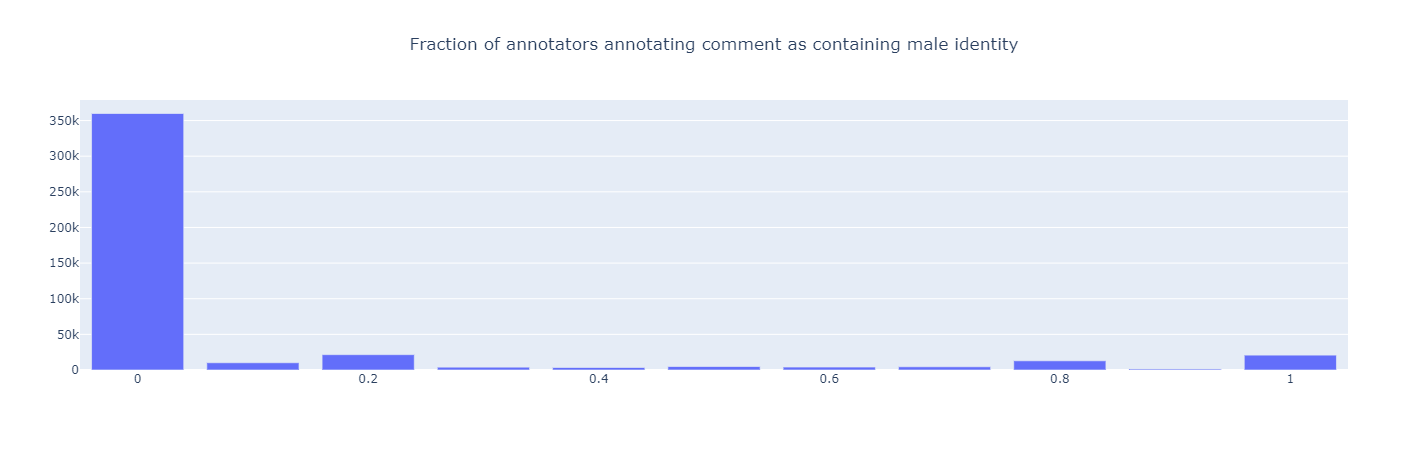

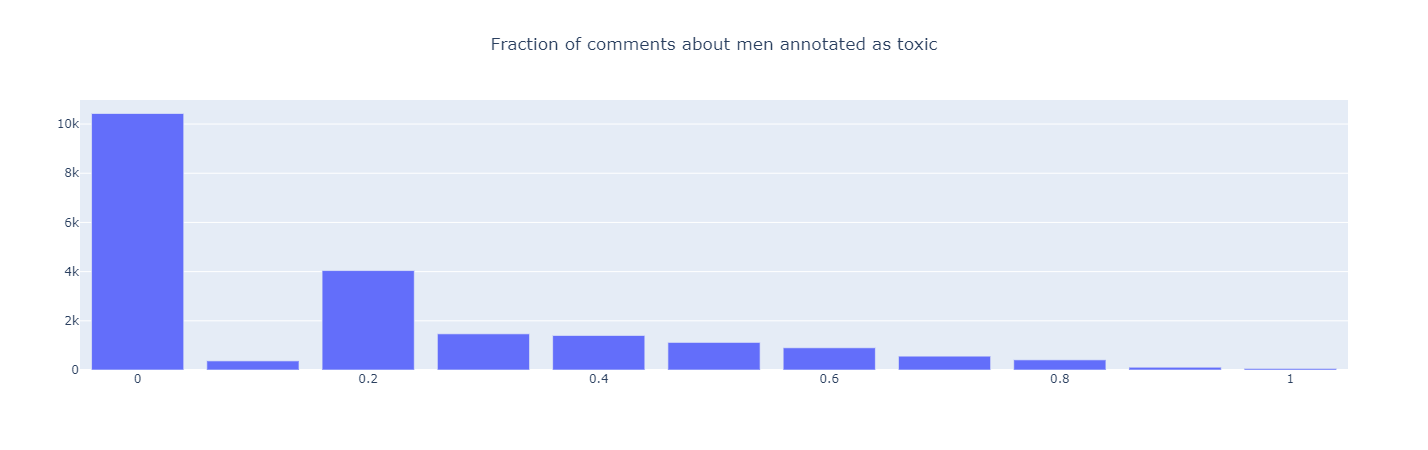

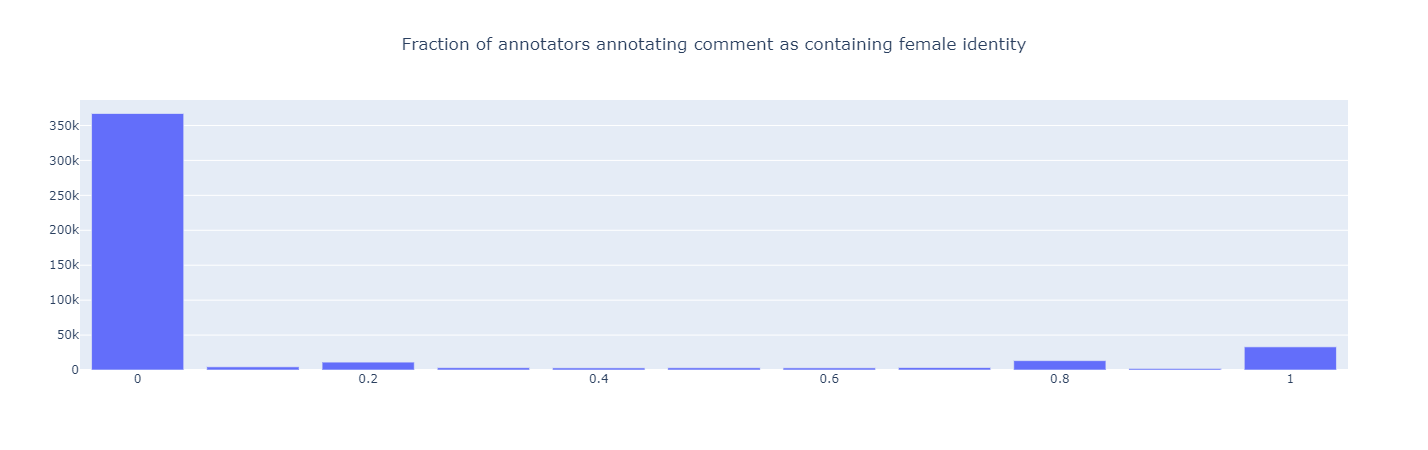

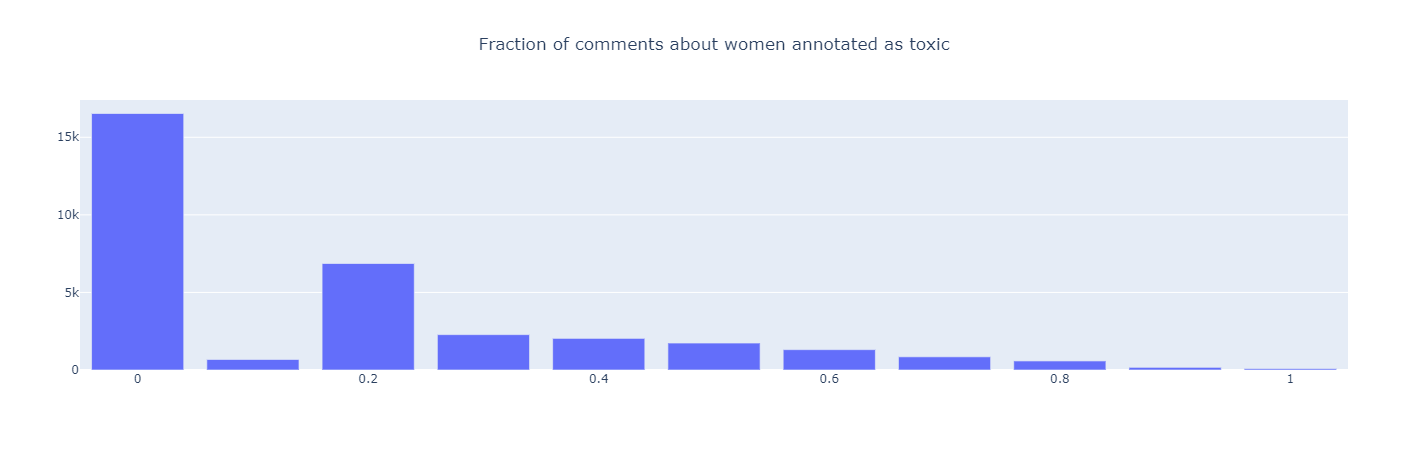

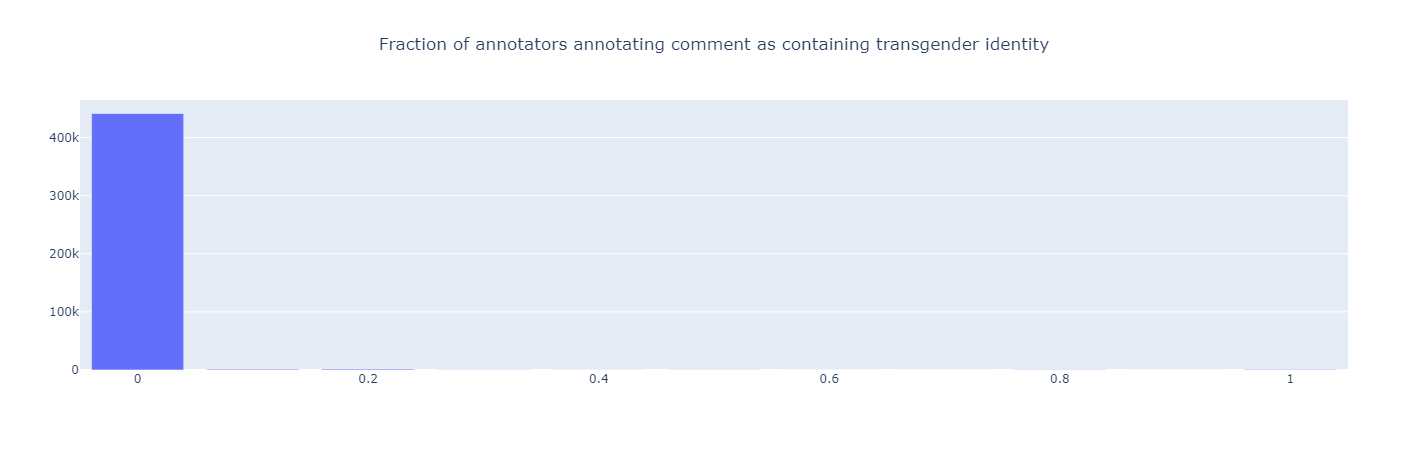

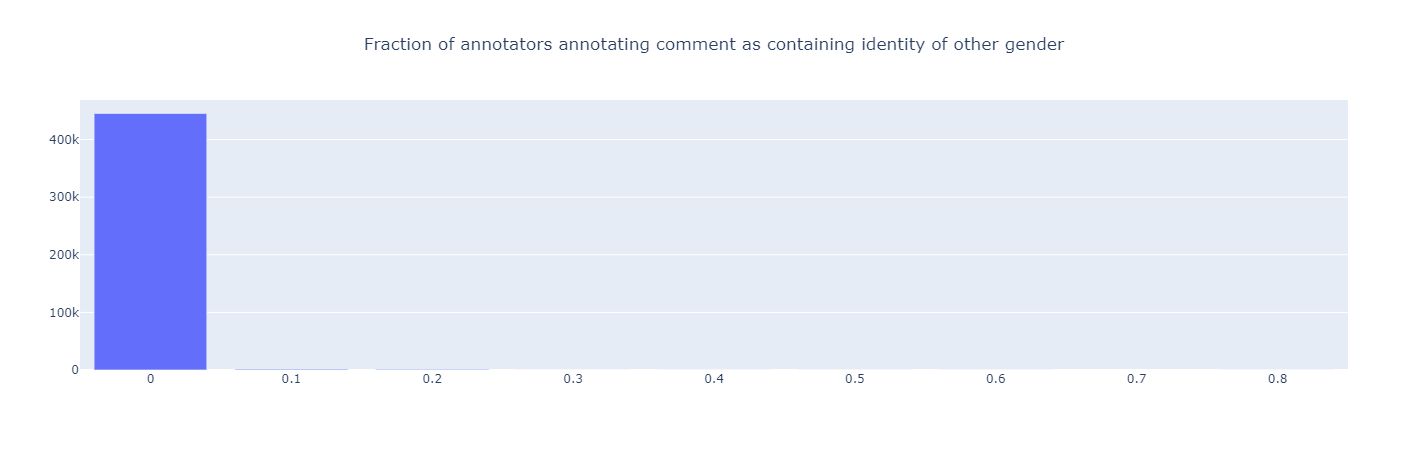

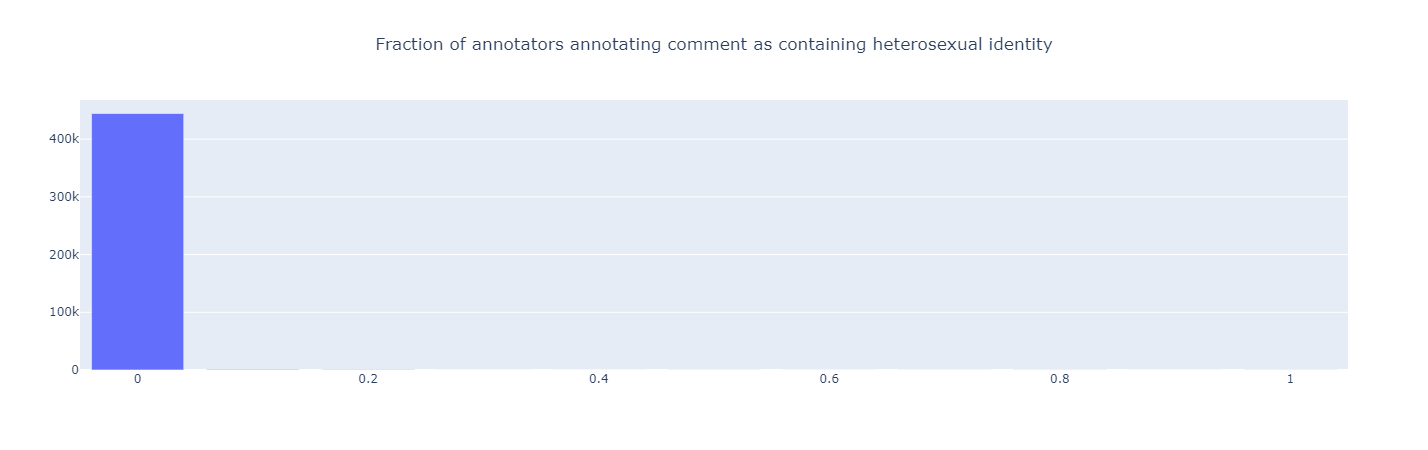

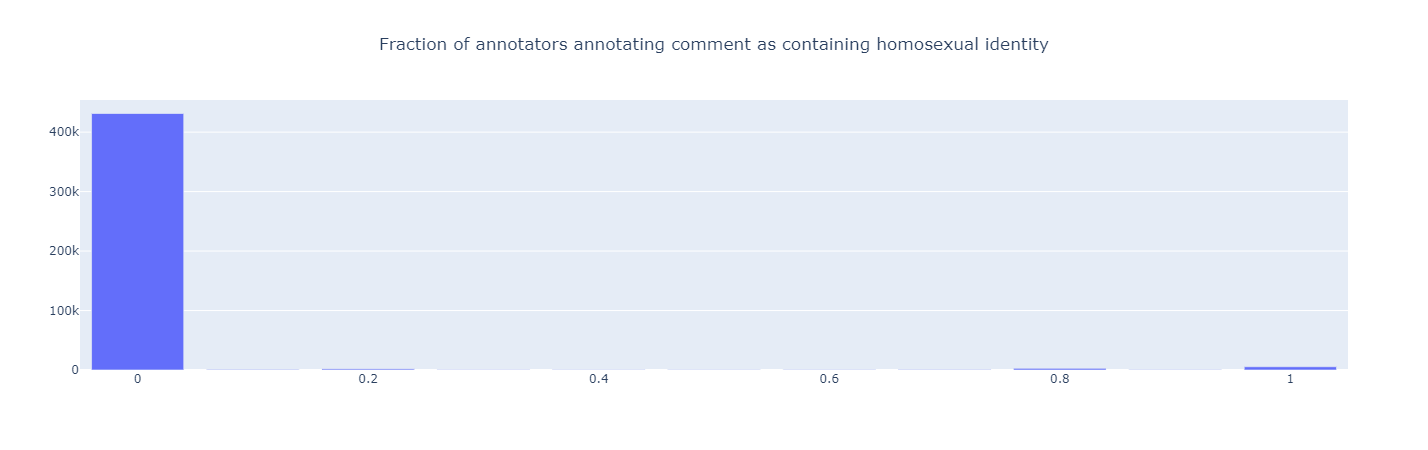

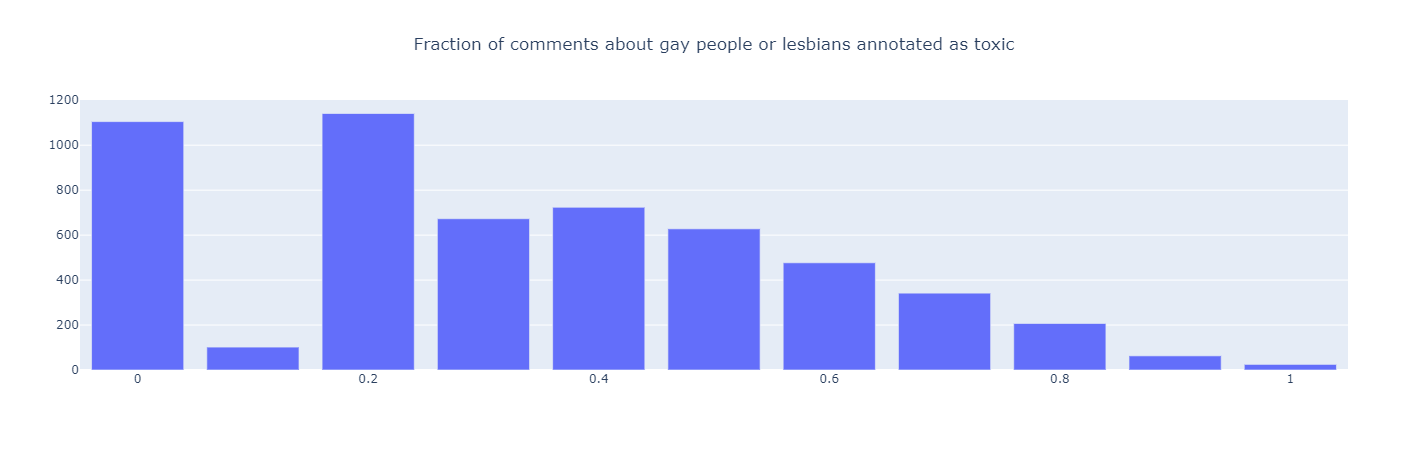

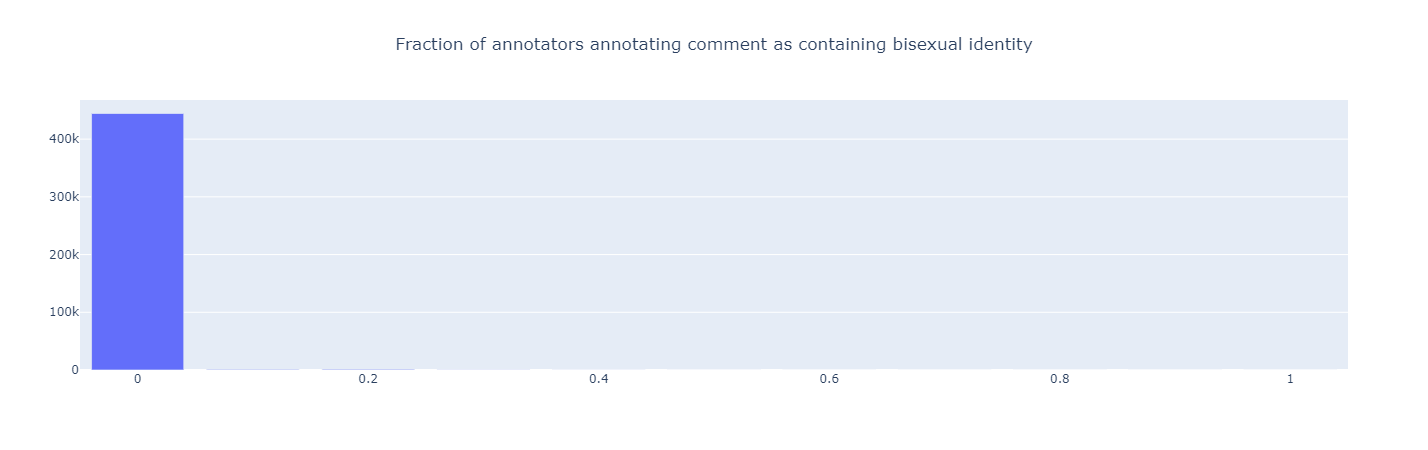

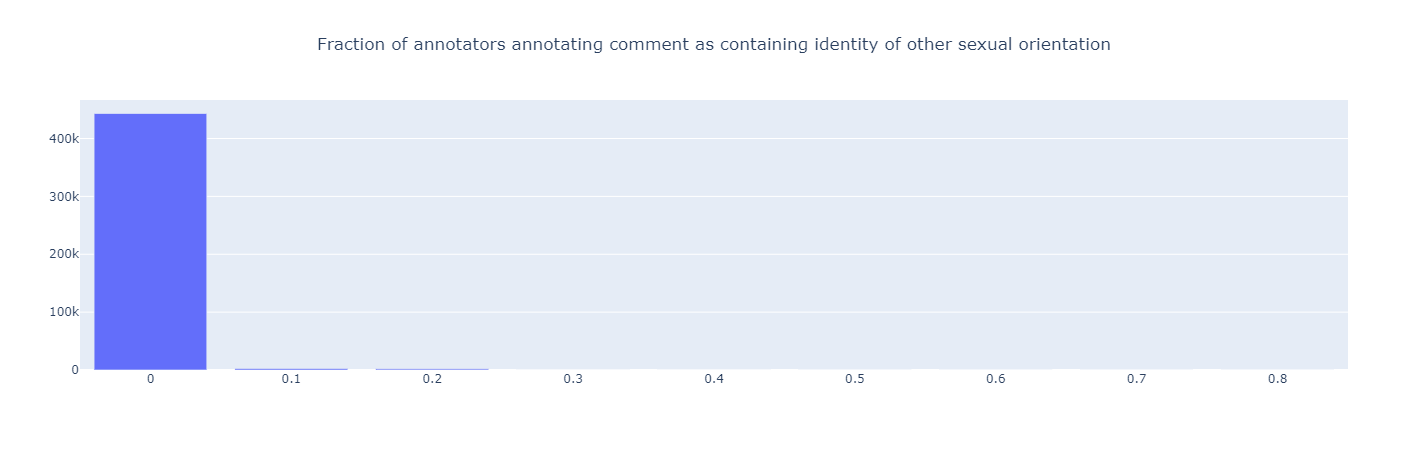

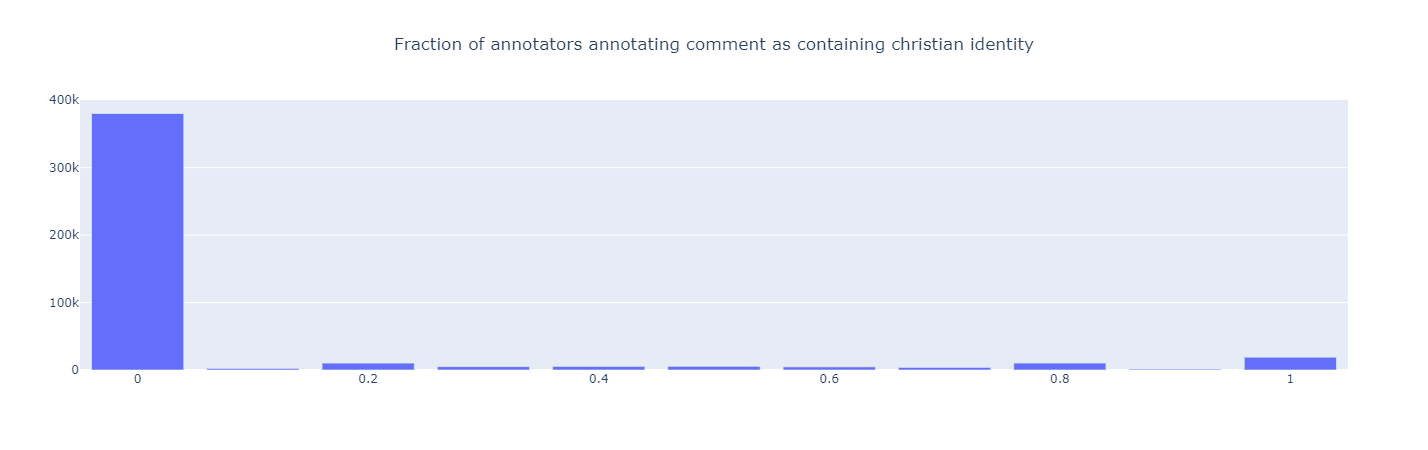

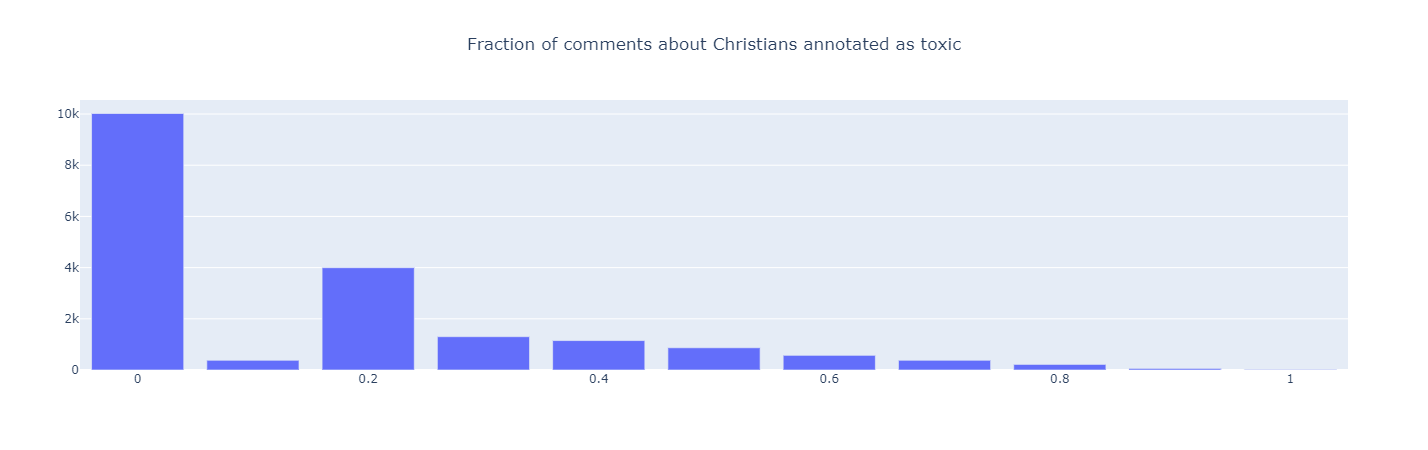

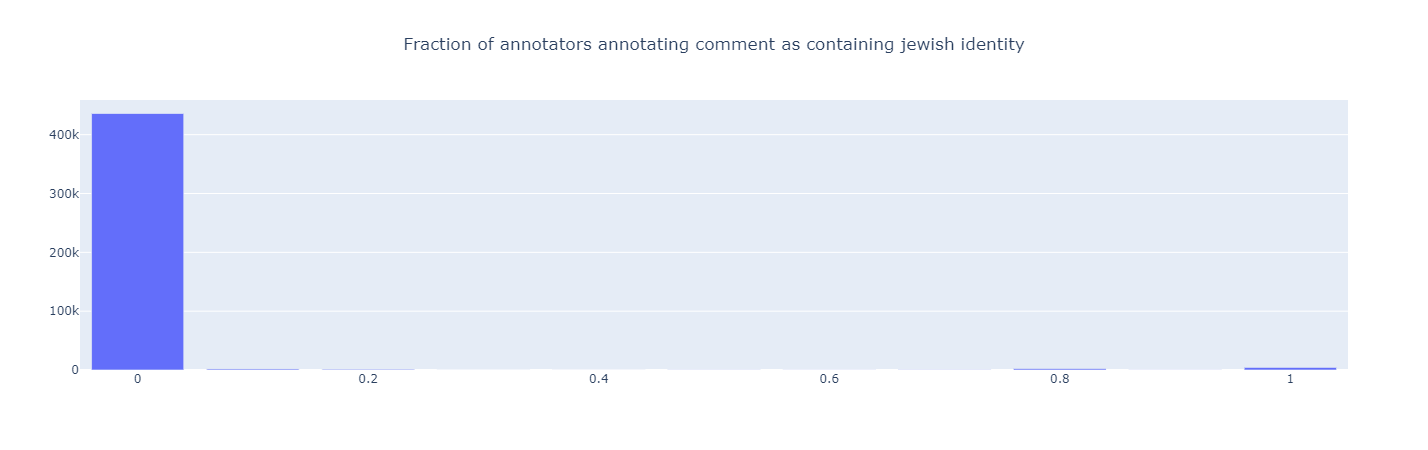

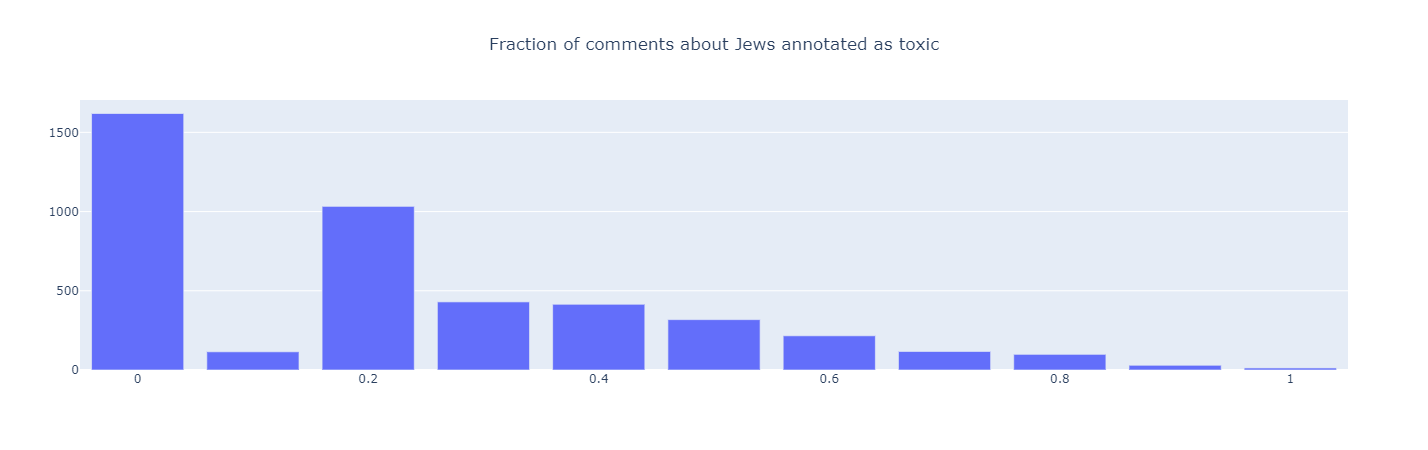

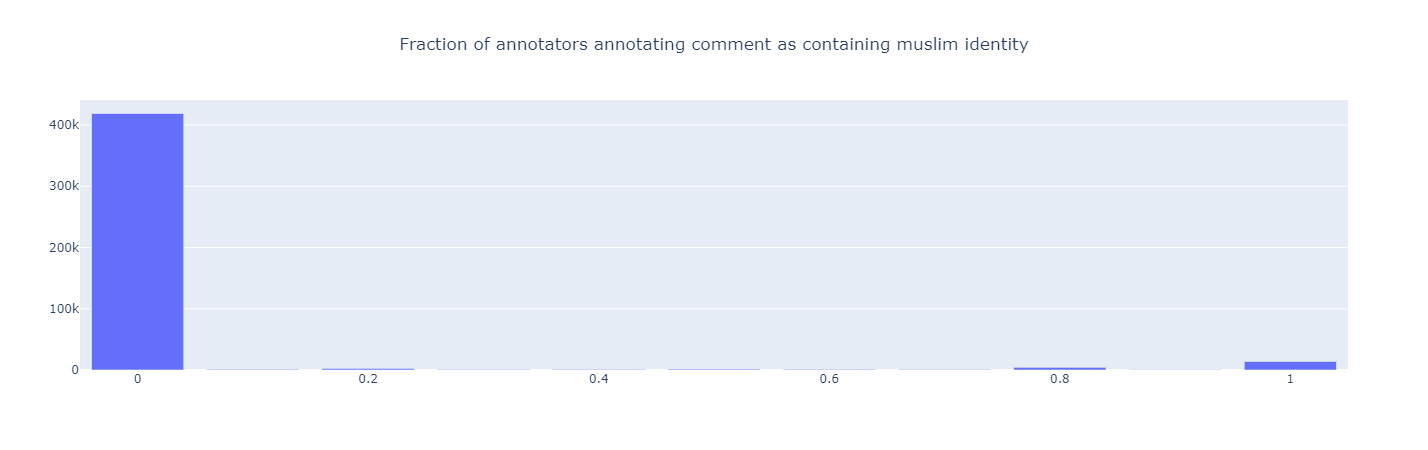

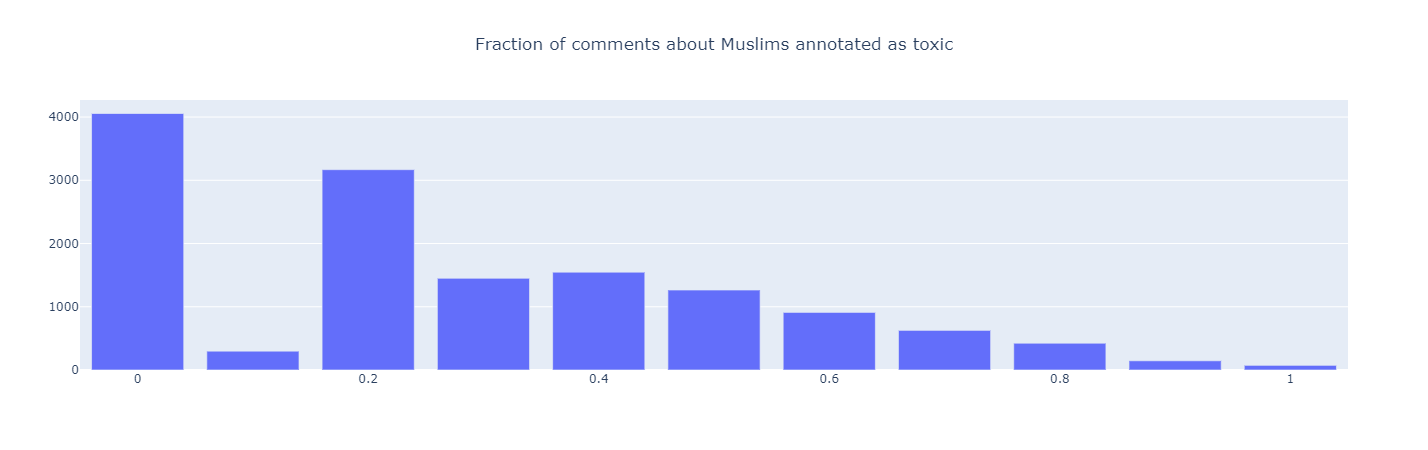

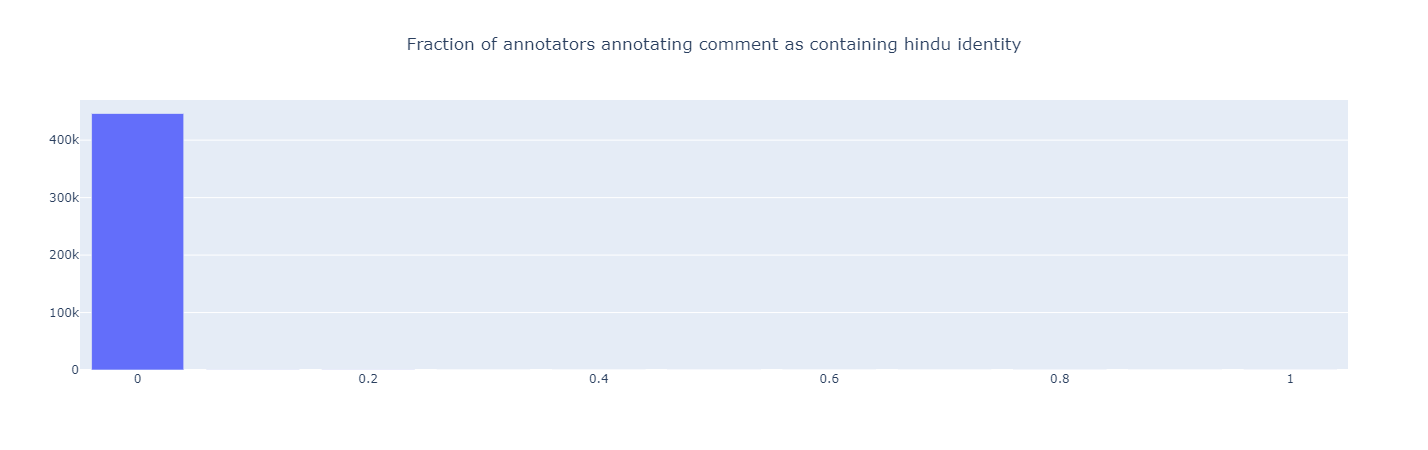

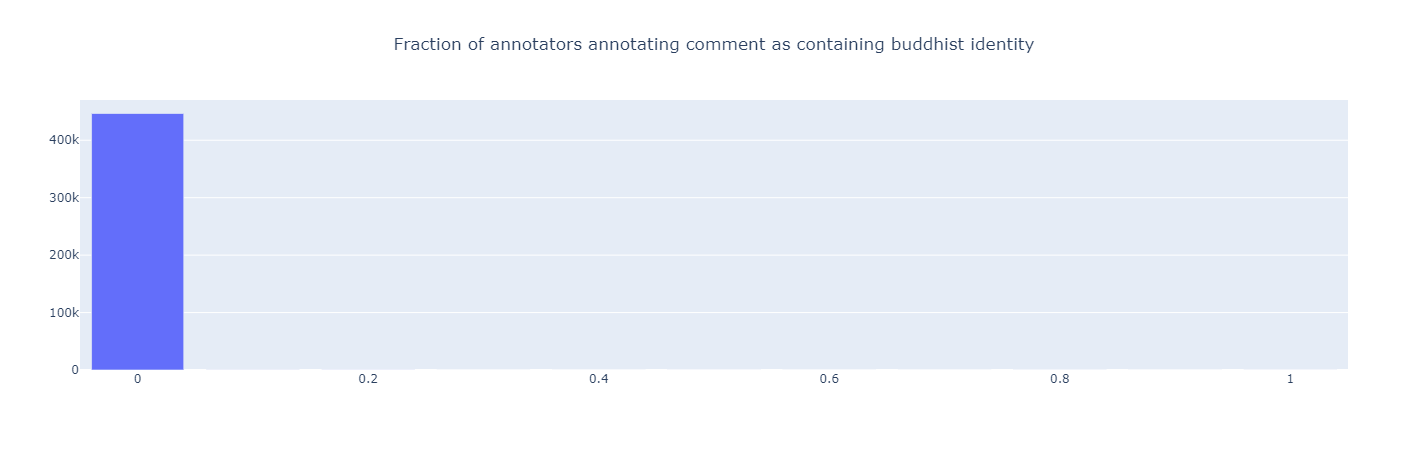

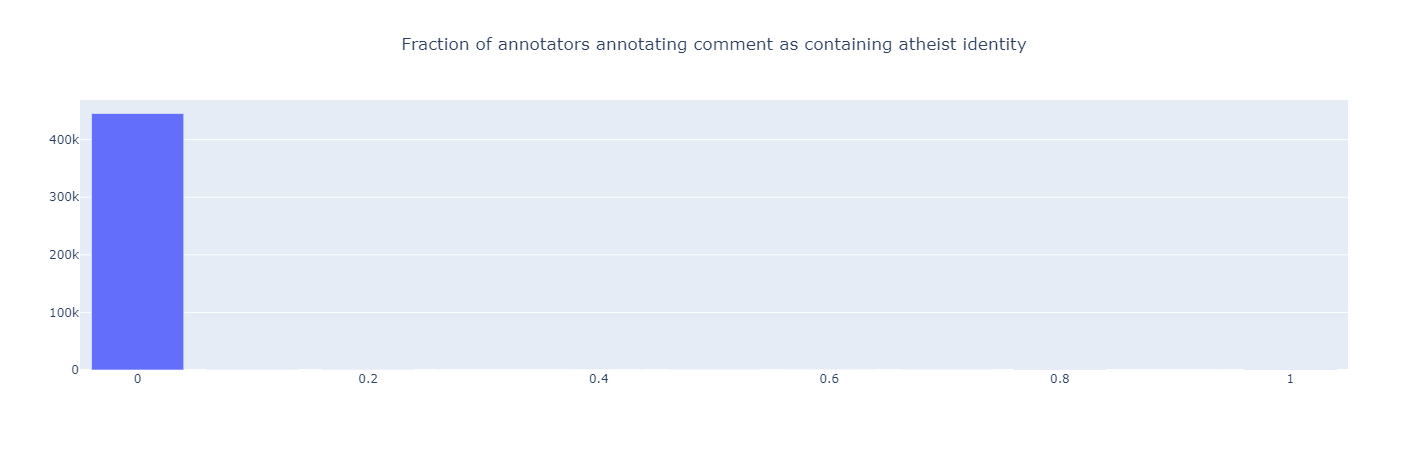

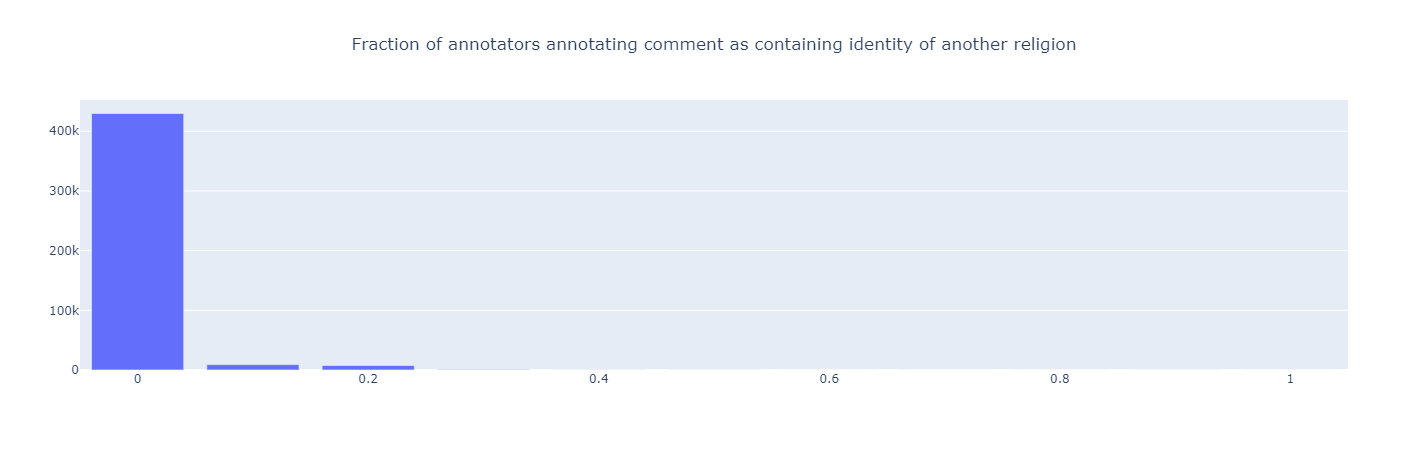

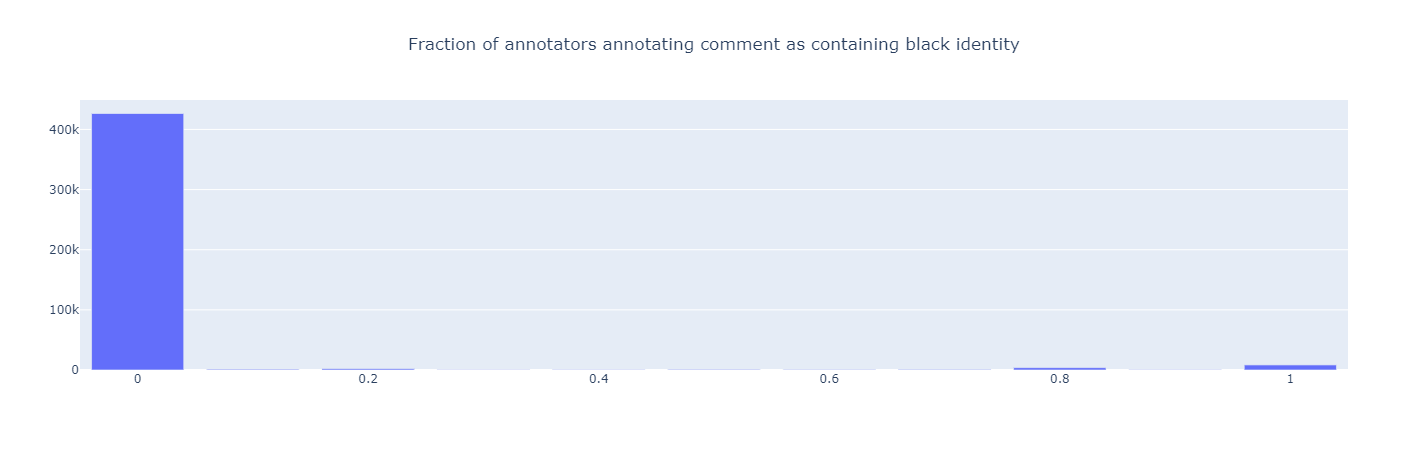

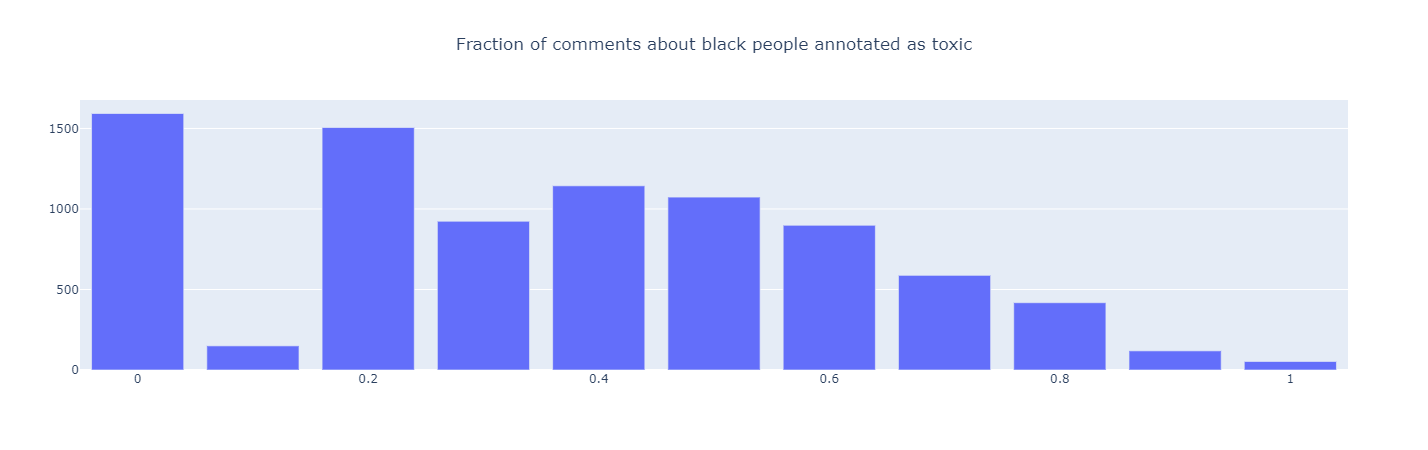

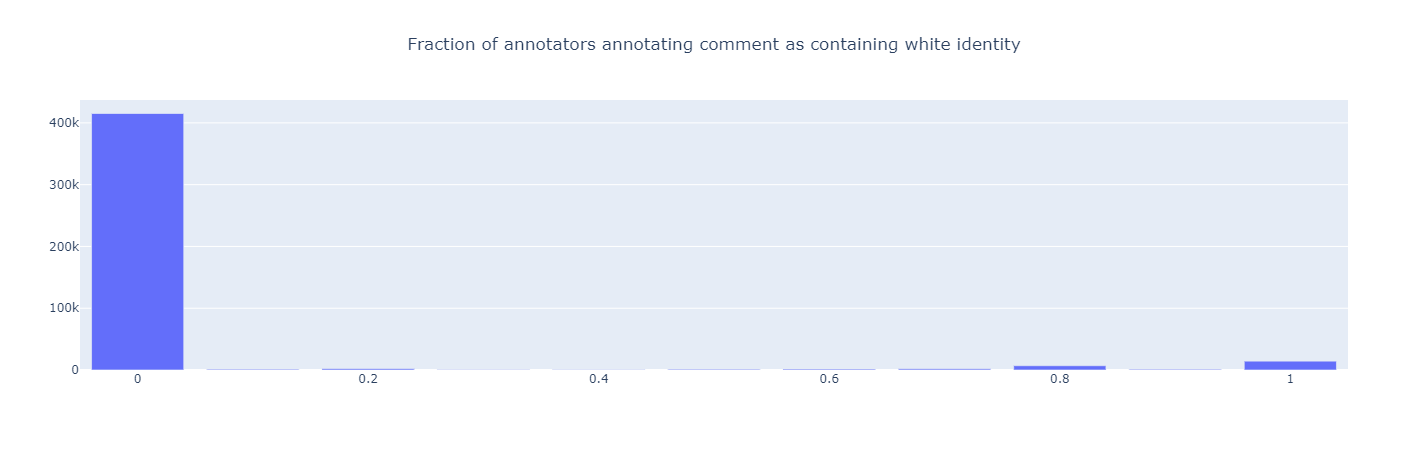

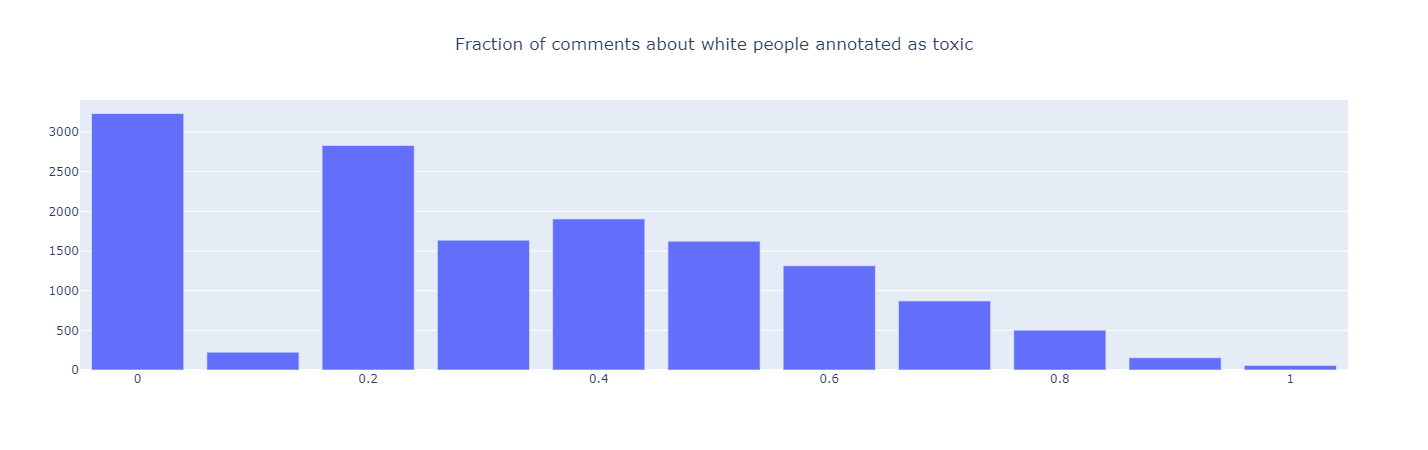

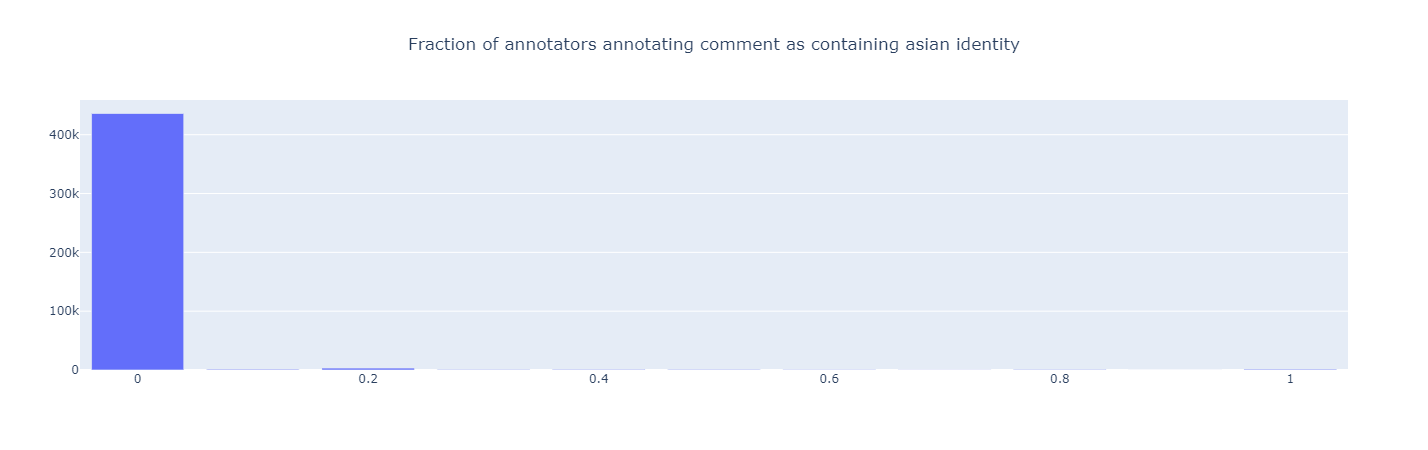

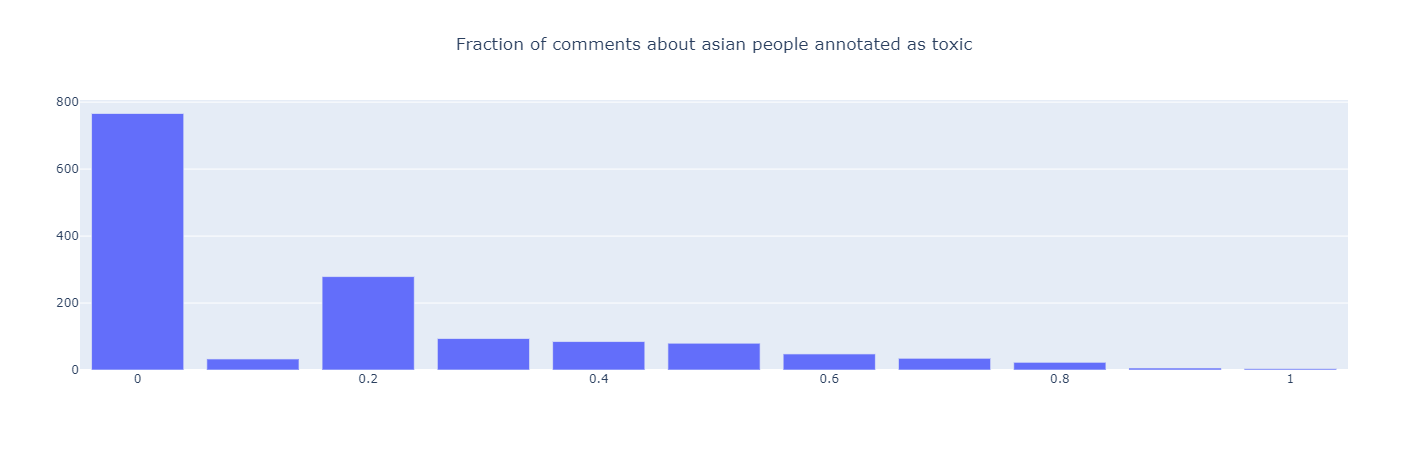

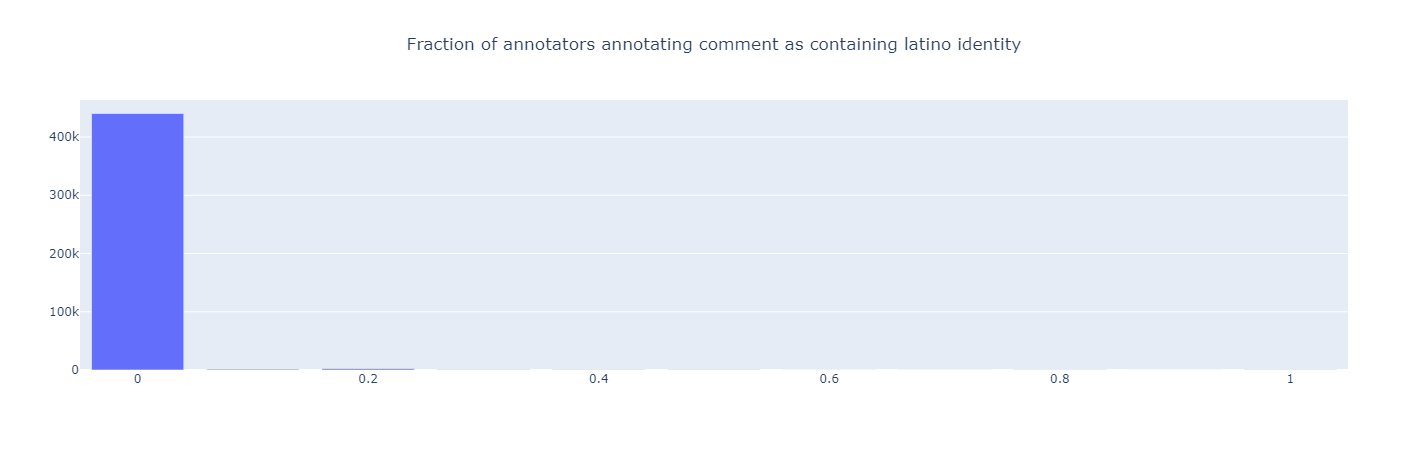

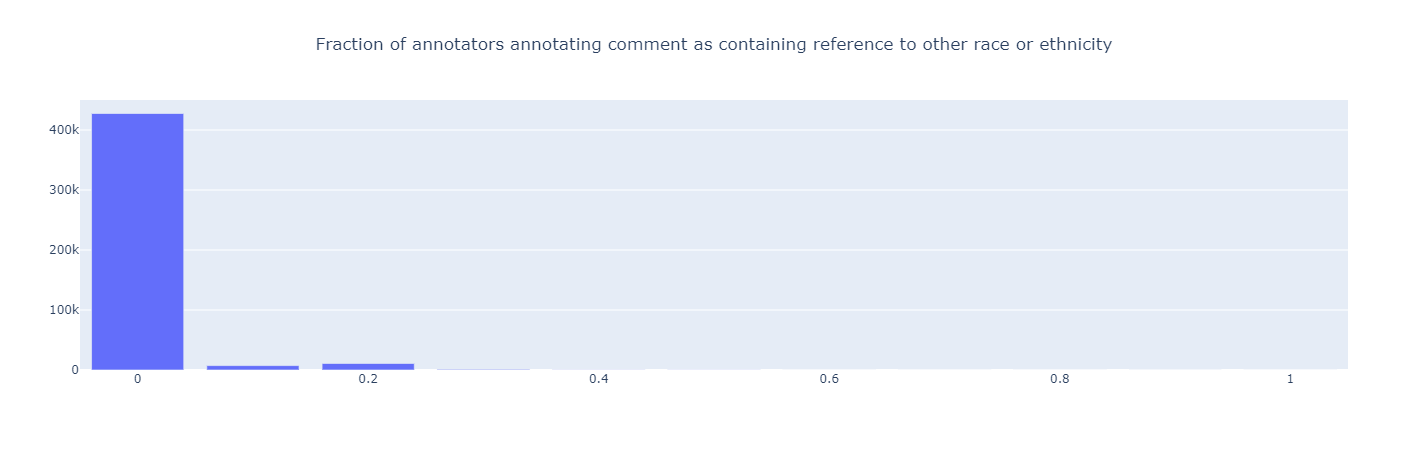

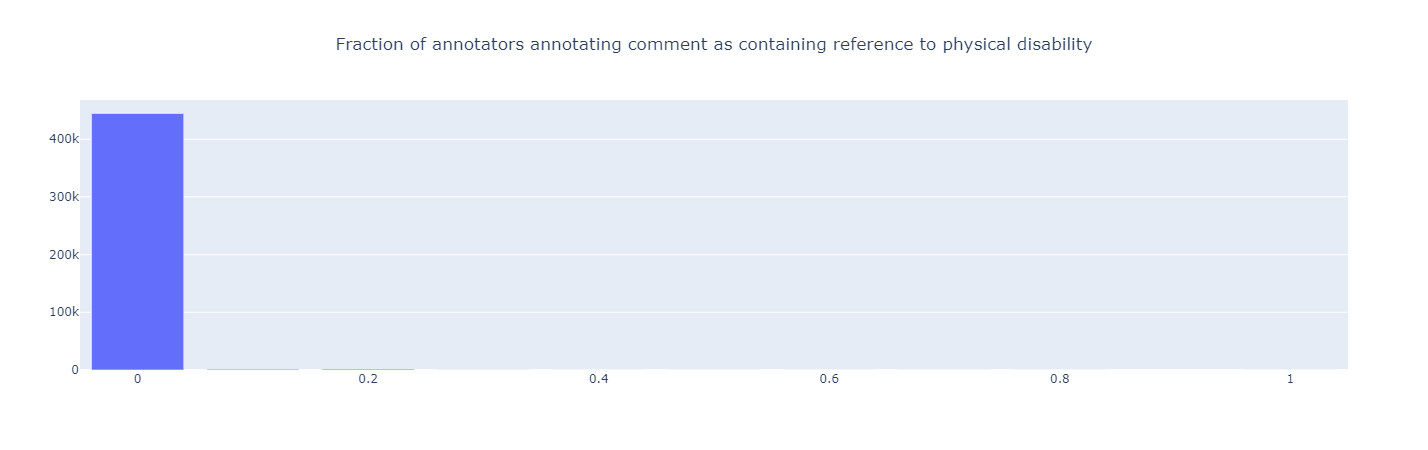

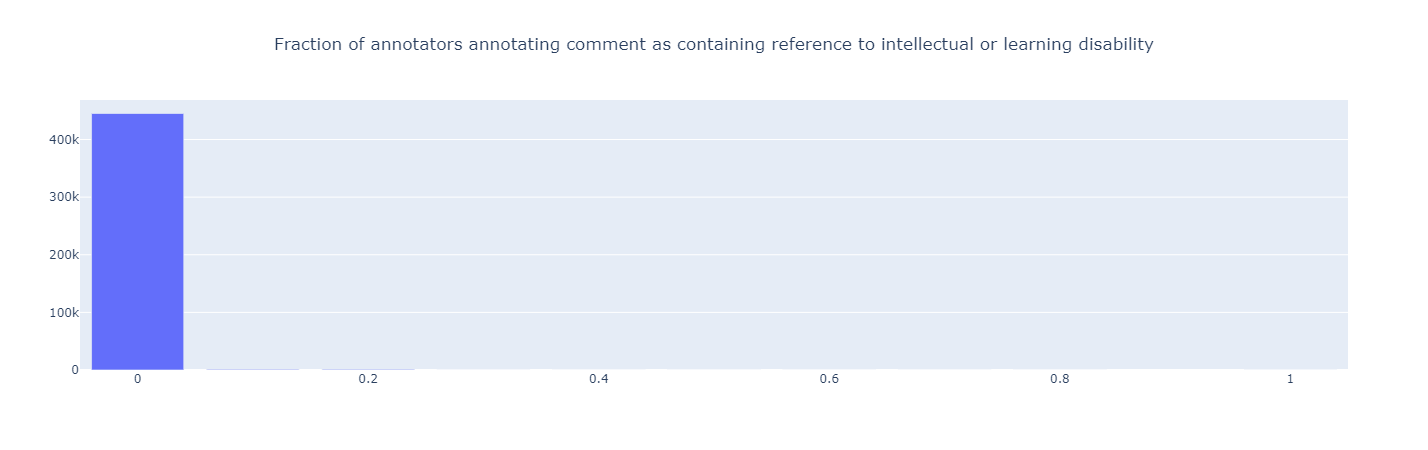

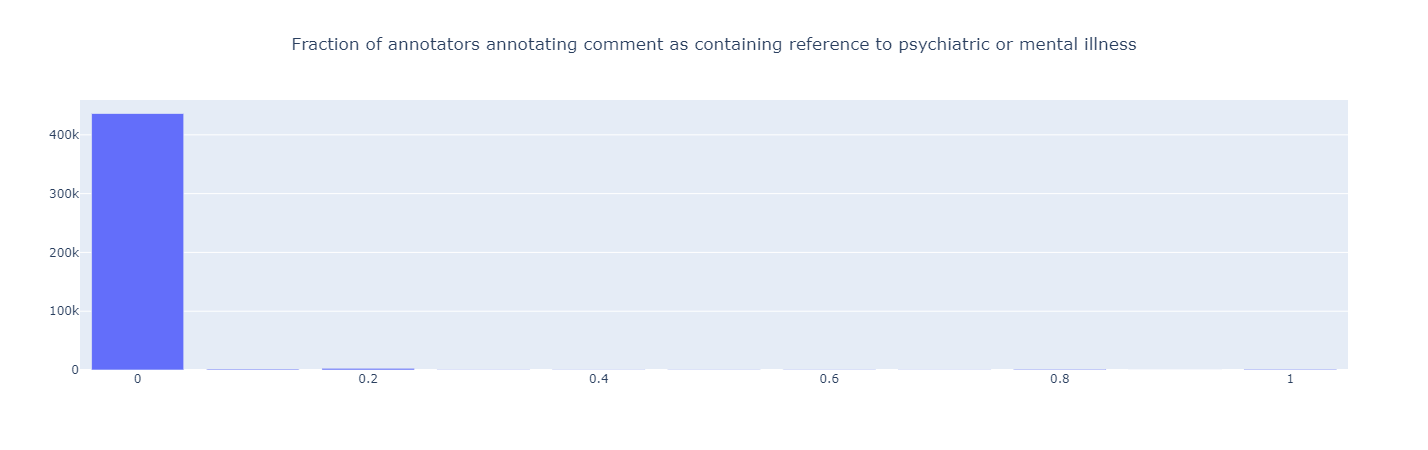

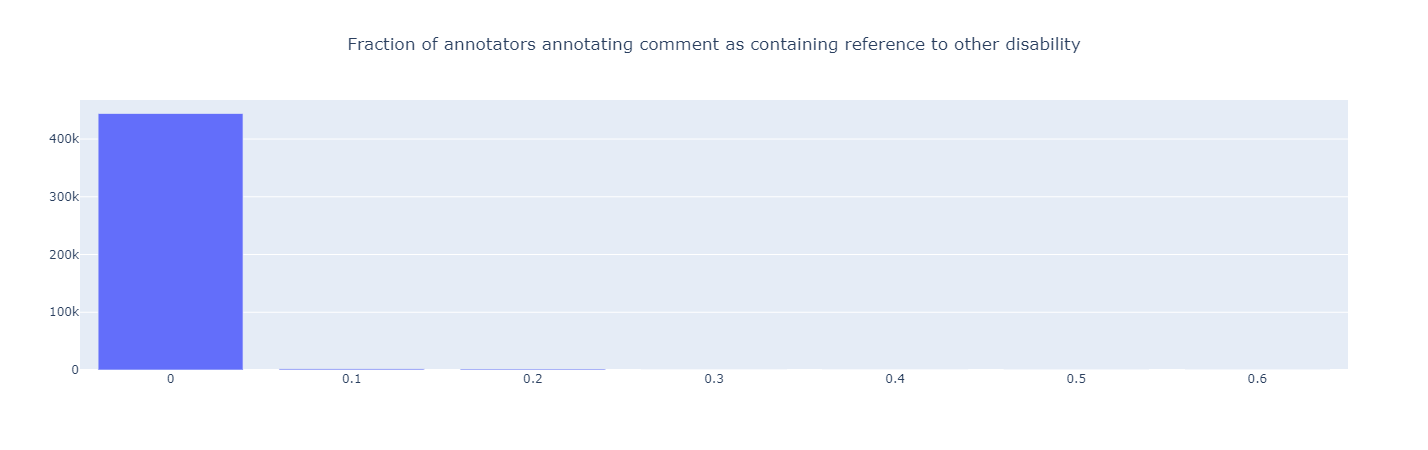

In [7]:
print(all_comments['identity_annotator_count'].mean())
print(all_comments['toxicity_annotator_count'].mean())

rounded = all_comments.round({'male':1})
s = rounded.male.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing male identity", title_x=0.5)
fig.show()

toxic_male = rounded[rounded['male']==1.0].round({'toxicity':1})
s = toxic_male.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about men annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'female':1})
s = rounded.female.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing female identity", title_x=0.5)
fig.show()

toxic_female = rounded[rounded['female']==1.0].round({'toxicity':1})
s = toxic_female.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about women annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'transgender':1})
s = rounded.transgender.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing transgender identity", title_x=0.5)
fig.show()

rounded = all_comments.round({'other_gender':1})
s = rounded.other_gender.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing identity of other gender", title_x=0.5)
fig.show()

rounded = all_comments.round({'heterosexual':1})
s = rounded.heterosexual.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing heterosexual identity", title_x=0.5)
fig.show()

rounded = all_comments.round({'homosexual_gay_or_lesbian':1})
s = rounded.homosexual_gay_or_lesbian.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing homosexual identity", title_x=0.5)
fig.show()

toxic_gay = rounded[rounded['homosexual_gay_or_lesbian']==1.0].round({'toxicity':1})
s = toxic_gay.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about gay people or lesbians annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'bisexual':1})
s = rounded.bisexual.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing bisexual identity", title_x=0.5)
fig.show()

rounded = all_comments.round({'other_sexual_orientation':1})
s = rounded.other_sexual_orientation.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing identity of other sexual orientation", title_x=0.5)
fig.show()

rounded = all_comments.round({'christian':1})
s = rounded.christian.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing christian identity", title_x=0.5)
fig.show()

toxic_christian = rounded[rounded['christian']==1.0].round({'toxicity':1})
s = toxic_christian.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about Christians annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'jewish':1})
s = rounded.jewish.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing jewish identity", title_x=0.5)
fig.show()

toxic_jew = rounded[rounded['jewish']==1.0].round({'toxicity':1})
s = toxic_jew.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about Jews annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'muslim':1})
s = rounded.muslim.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing muslim identity", title_x=0.5)
fig.show()

toxic_muslim = rounded[rounded['muslim']==1.0].round({'toxicity':1})
s = toxic_muslim.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about Muslims annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'hindu':1})
s = rounded.hindu.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing hindu identity", title_x=0.5)
fig.show()

rounded = all_comments.round({'buddhist':1})
s = rounded.buddhist.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing buddhist identity", title_x=0.5)
fig.show()

rounded = all_comments.round({'atheist':1})
s = rounded.atheist.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing atheist identity", title_x=0.5)
fig.show()

rounded = all_comments.round({'other_religion':1})
s = rounded.other_religion.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing identity of another religion", title_x=0.5)
fig.show()

rounded = all_comments.round({'black':1})
s = rounded.black.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing black identity", title_x=0.5)
fig.show()

toxic_black = rounded[rounded['black']==1.0].round({'toxicity':1})
s = toxic_black.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about black people annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'white':1})
s = rounded.white.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing white identity", title_x=0.5)
fig.show()

toxic_white = rounded[rounded['white']==1.0].round({'toxicity':1})
s = toxic_white.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about white people annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'asian':1})
s = rounded.asian.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing asian identity", title_x=0.5)
fig.show()

toxic_asian = rounded[rounded['asian']==1.0].round({'toxicity':1})
s = toxic_asian.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about asian people annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'latino':1})
s = rounded.latino.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing latino identity", title_x=0.5)
fig.show()

rounded = all_comments.round({'other_race_or_ethnicity':1})
s = rounded.other_race_or_ethnicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing reference to other race or ethnicity", title_x=0.5)
fig.show()

rounded = all_comments.round({'physical_disability':1})
s = rounded.physical_disability.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing reference to physical disability", title_x=0.5)
fig.show()

rounded = all_comments.round({'intellectual_or_learning_disability':1})
s = rounded.intellectual_or_learning_disability.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing reference to intellectual or learning disability", title_x=0.5)
fig.show()

rounded = all_comments.round({'psychiatric_or_mental_illness':1})
s = rounded.psychiatric_or_mental_illness.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing reference to psychiatric or mental illness", title_x=0.5)
fig.show()

rounded = all_comments.round({'other_disability':1})
s = rounded.other_disability.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing reference to other disability", title_x=0.5)
fig.show()

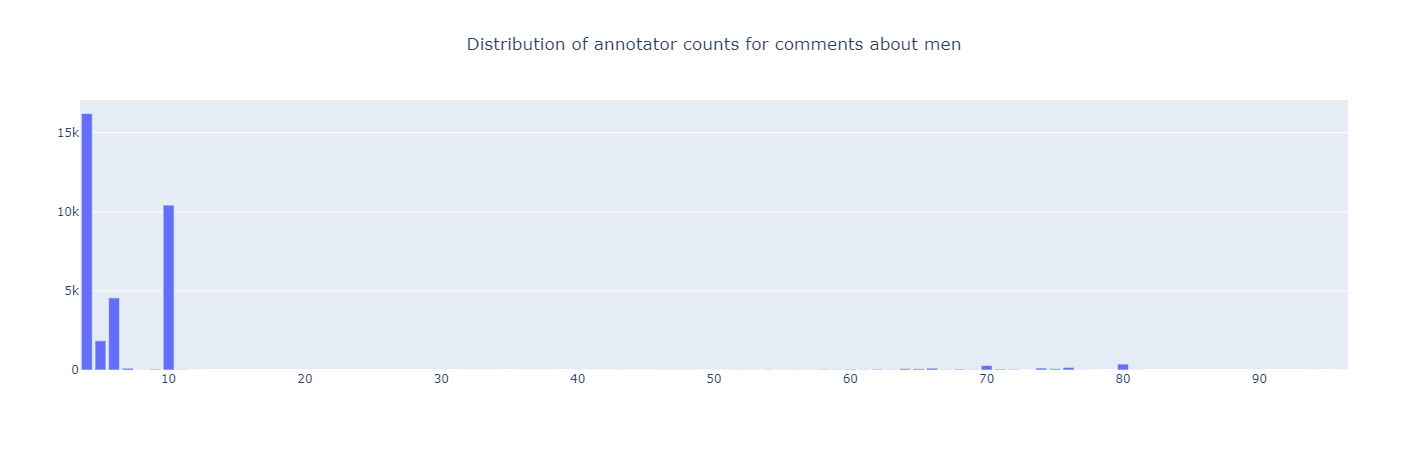

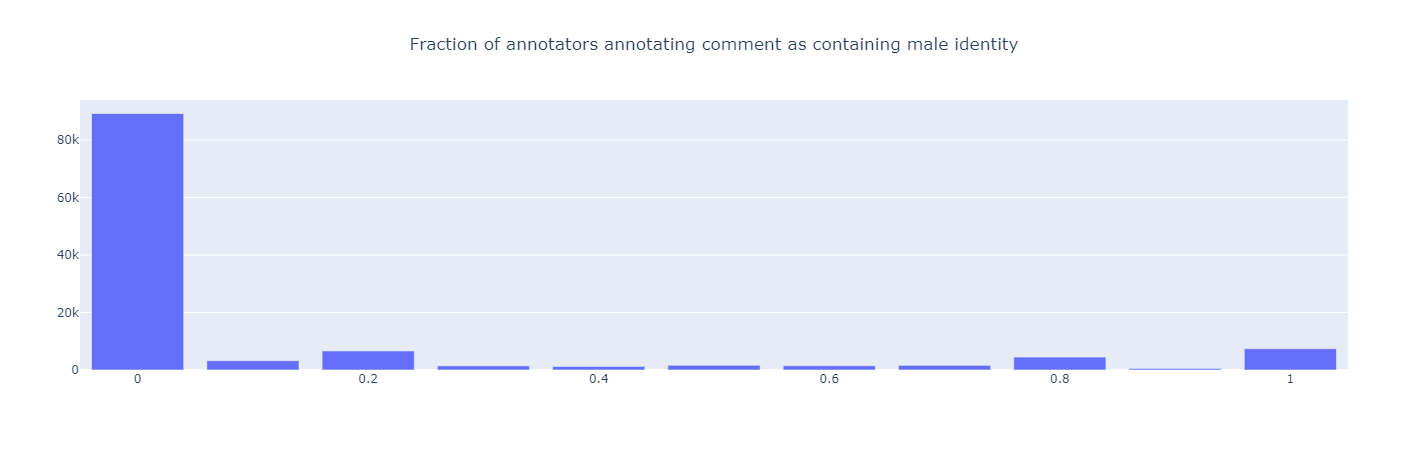

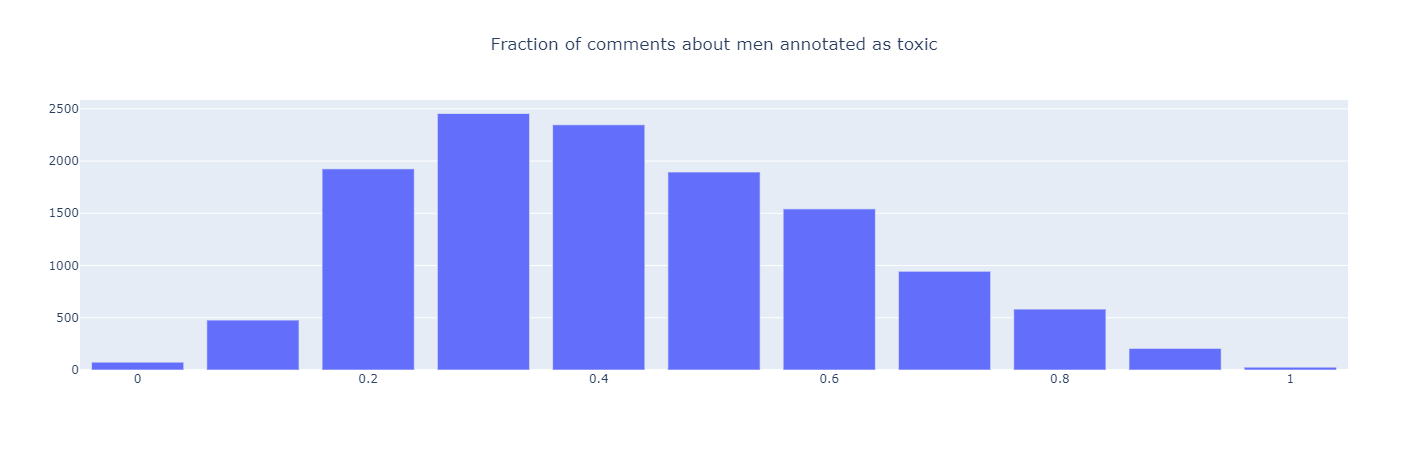

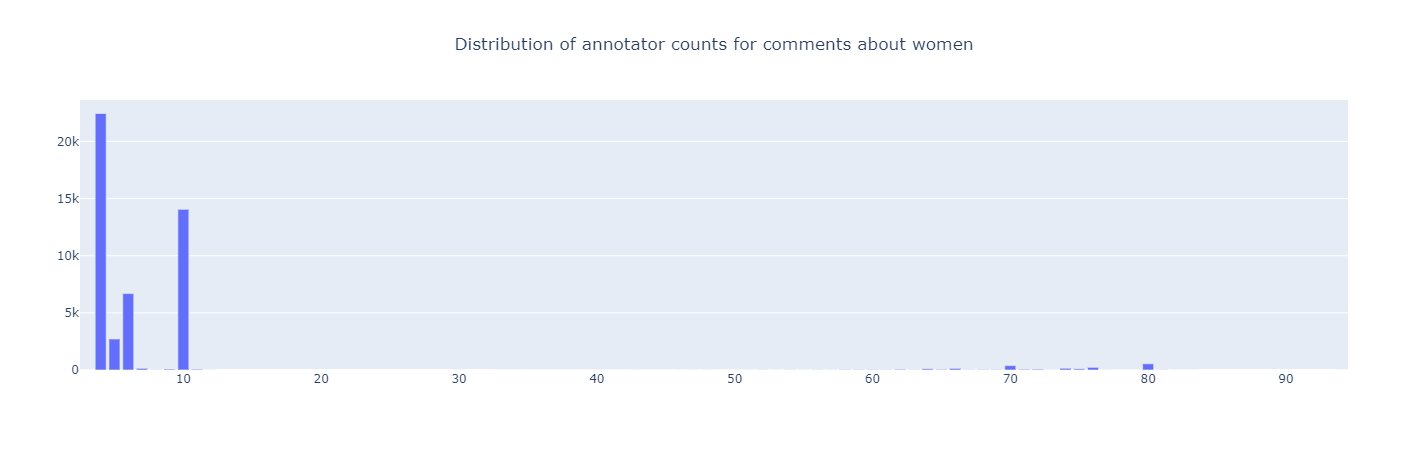

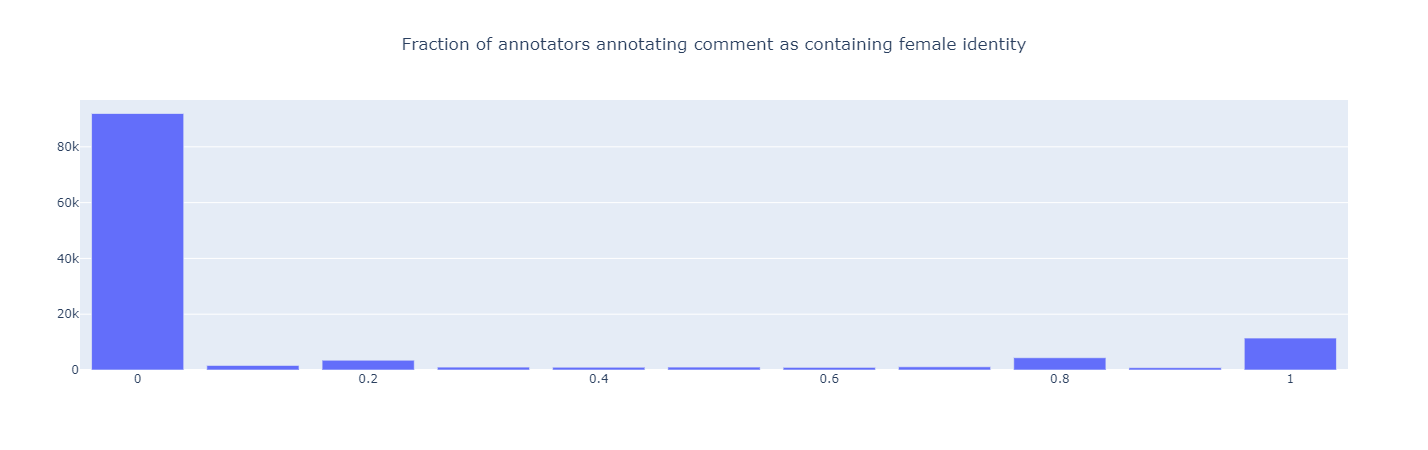

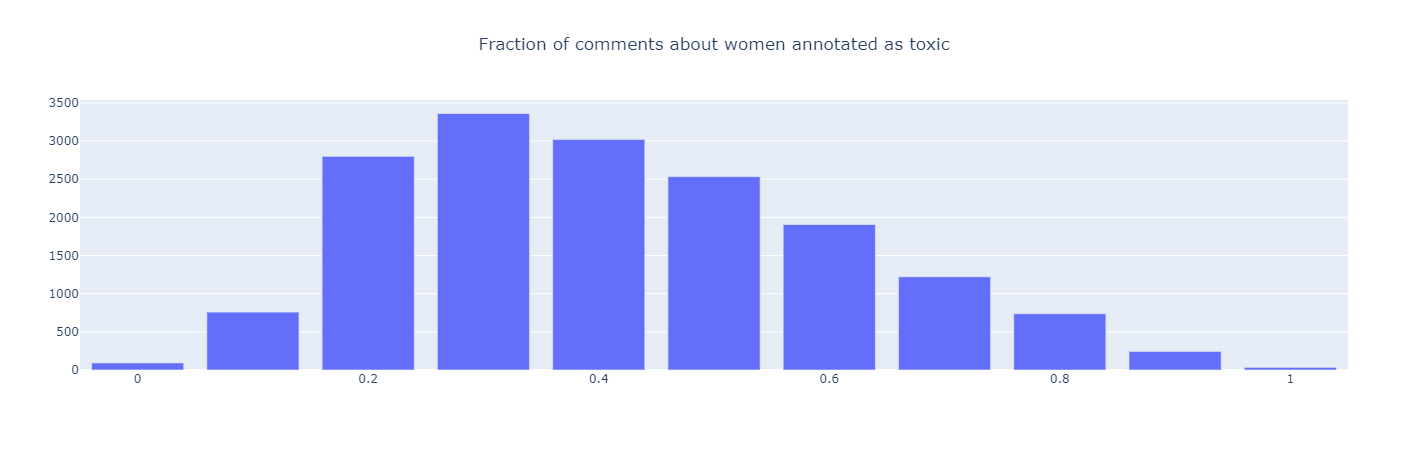

5227 comments reference men and women
1028 comments reference men and black people
861 comments reference women and black people
2342 comments reference men and white people
1153 comments reference women and white people
3146 comments reference black and white people
3937 comments reference gender and race


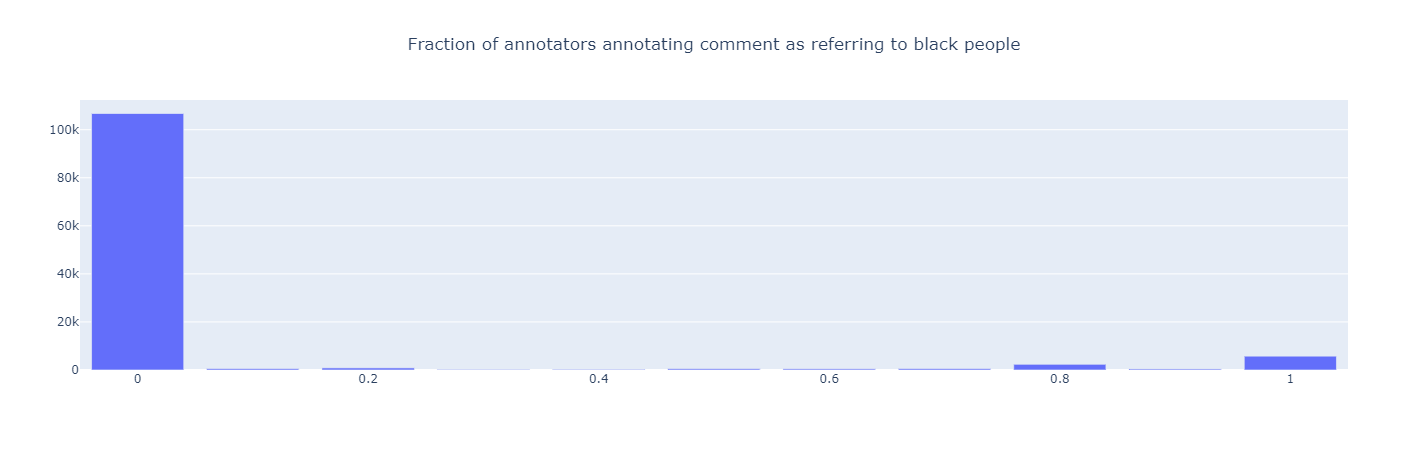

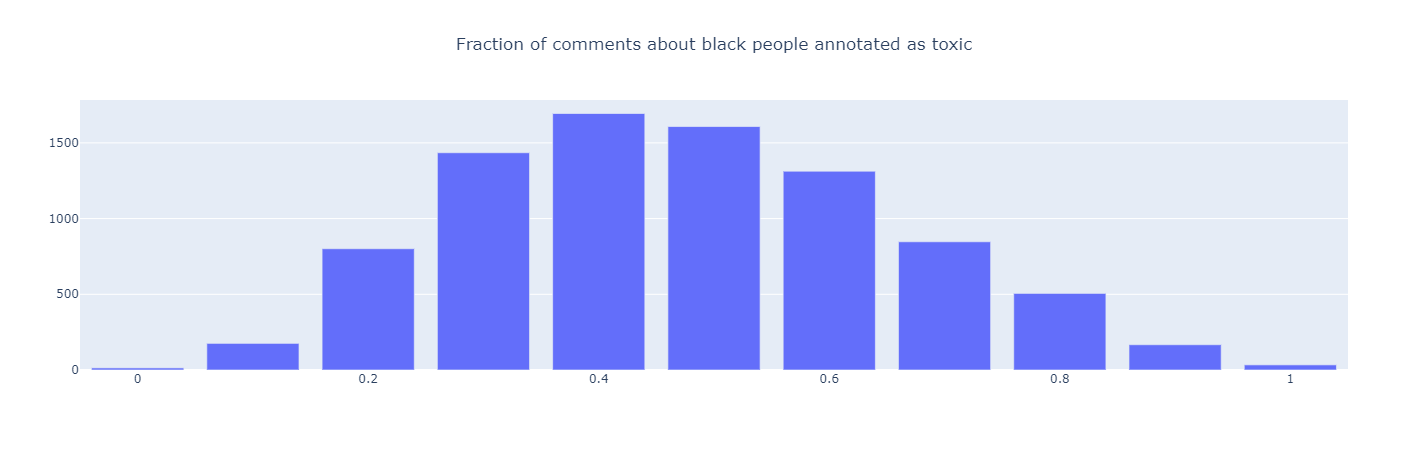

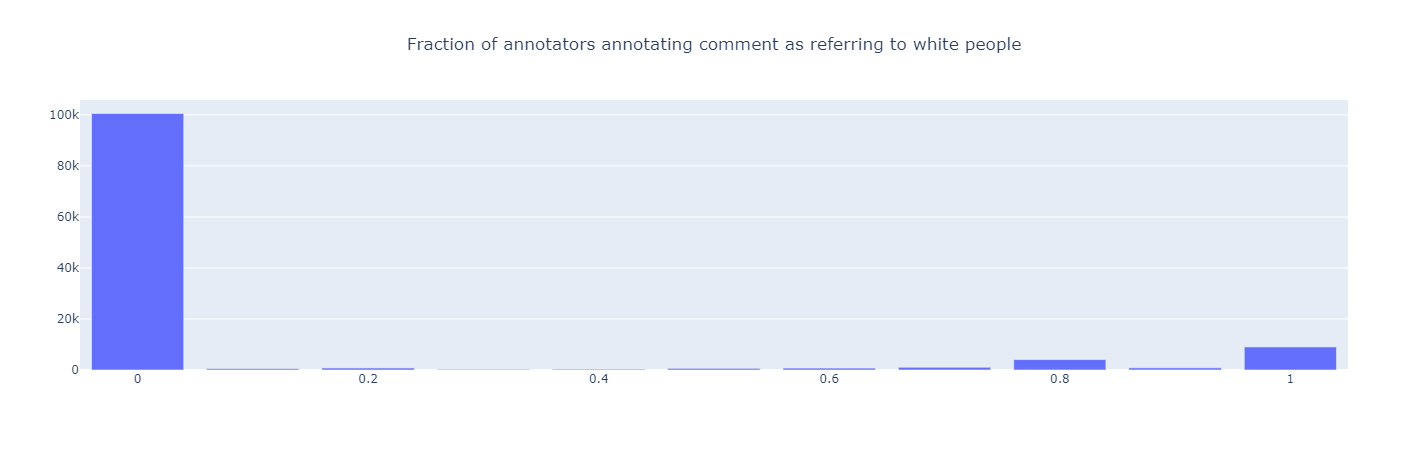

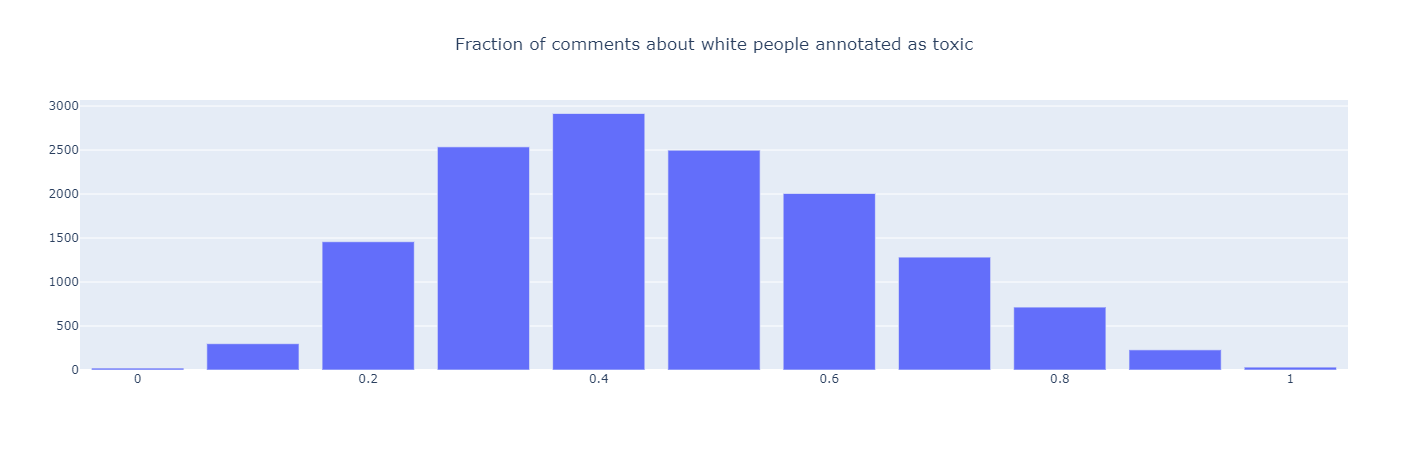

comment_text  \
id                                                                                                                                                                                                                                                                                                                     
5892815  Why is this black racist crap still on the G&M website?\n\nI stopped talking to black people long ago because I was afraid for my life!!!!!\nSince 80%-90% of all crime is by black people it kinda makes sense doesn't it.\nOh wait thats profiling or is it driving while black? \nI don't know you LE...   
377096                                                                                                                                                                                                                                       "Let's get the black folks and the white folks at each others' throats"   
5697567                                       Are you a Pilgrim?\nWhy arn't you growing your own veggies? \nAnd do you haul them in a covered wagon?\n\nThankfully it isn't up to "white man" to determine what is traditional for the First Peoples of Alaska.\nBut they try to all the time and it looks pathetic.   
7160163                                                                                                                                                                                                                                                       And there it is. Our president is a white supremacist.   
5927235                                                                                                                                                                                                                                                              No, he was accused of being a racist white man.   

         split                   created_date  publication_id  parent_id  \
id                                                                         
5892815  train  2017-09-03 23:20:08.226613+00              54        NaN   
377096   train  2016-07-06 16:49:00.967646+00              21        NaN   
5697567  train  2017-08-01 18:39:14.212043+00              21  5697419.0   
7160163   test  2017-08-17 16:19:08.435159+00             102        NaN   
5927235  train  2017-09-09 23:17:58.536995+00              13  5924646.0   

         article_id    rating  funny  wow  sad  likes  disagree  toxicity  \
id                                                                          
5892815      373428  rejected      0    0    0      0         0  0.757143   
377096       140782  approved      0    0    0      2         0  0.736842   
5697567      361553  approved      0    0    0      1         0  0.800000   
7160163      367562  approved      0    1    0      7         3  0.507042   
5927235      375740  approved      0    0    0      0         0  0.363636   

         severe_toxicity   obscene  sexual_explicit  identity_attack  \
id                                                                     
5892815         0.142857  0.471429         0.014286         0.614286   
377096          0.078947  0.000000         0.013158         0.631579   
5697567         0.000000  0.000000         0.000000         0.400000   
7160163         0.000000  0.000000         0.000000         0.323944   
5927235         0.038961  0.000000         0.000000         0.298701   

           insult    threat  male  female  transgender  other_gender  \
id                                                                     
5892815  0.642857  0.000000   0.0     0.0          0.0           0.0   
377096   0.236842  0.250000   0.0     0.0          0.0           0.0   
5697567  0.500000  0.000000   1.0     0.0          0.0           0.0   
7160163  0.323944  0.014085   0.0     0.0          0.0           0.0   
5927235  0.272727  0.000000   1.0     0.0          0.0           0.0   

         heterosexual  homos

In [52]:
# taking annotator count >=10 for chosen subgroups

rounded = all_comments.round({'male':1})
rounded = rounded[rounded['male']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']<100]
s = rounded.toxicity_annotator_count.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Distribution of annotator counts for comments about men", title_x=0.5)
fig.show()

rounded = all_comments.round({'male':1})
rounded = rounded[rounded['toxicity_annotator_count']>=10]
s = rounded.male.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing male identity", title_x=0.5)
fig.show()

toxic_male = rounded[rounded['male']>=0.8].round({'toxicity':1})
s = toxic_male.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about men annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'female':1})
rounded = rounded[rounded['female']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']<100]
s = rounded.toxicity_annotator_count.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Distribution of annotator counts for comments about women", title_x=0.5)
fig.show()

rounded = all_comments.round({'female':1})
rounded = rounded[rounded['toxicity_annotator_count']>=10]
s = rounded.female.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as containing female identity", title_x=0.5)
fig.show()

toxic_female = rounded[rounded['female']>=0.8].round({'toxicity':1})
s = toxic_female.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about women annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'female':1})
rounded = rounded[rounded['female']>=0.8]
rounded = rounded.round({'male':1})
rounded = rounded[rounded['male']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']>=10]
print(rounded.shape[0], "comments reference men and women")

rounded = all_comments.round({'male':1})
rounded = rounded[rounded['male']>=0.8]
rounded = rounded.round({'black':1})
rounded = rounded[rounded['black']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']>=10]
print(rounded.shape[0], "comments reference men and black people")

rounded = all_comments.round({'female':1})
rounded = rounded[rounded['female']>=0.8]
rounded = rounded.round({'black':1})
rounded = rounded[rounded['black']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']>=10]
print(rounded.shape[0], "comments reference women and black people")

rounded = all_comments.round({'male':1})
rounded = rounded[rounded['male']>=0.8]
rounded = rounded.round({'white':1})
rounded = rounded[rounded['white']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']>=10]
print(rounded.shape[0], "comments reference men and white people")

rounded = all_comments.round({'female':1})
rounded = rounded[rounded['female']>=0.8]
rounded = rounded.round({'white':1})
rounded = rounded[rounded['white']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']>=10]
print(rounded.shape[0], "comments reference women and white people")

rounded = all_comments.round({'black':1})
rounded = rounded[rounded['black']>=0.8]
rounded = rounded.round({'white':1})
rounded = rounded[rounded['white']>=0.8]
rounded = rounded[rounded['toxicity_annotator_count']>=10]
print(rounded.shape[0], "comments reference black and white people")

rounded = all_comments.round({'white':1,'black':1,'female':1,'male':1})
rounded = rounded[(rounded.female>=0.8)|(rounded.male>=0.8)]
rounded = rounded[(rounded.black>=0.8)|(rounded.white>=0.8)]
rounded = rounded[rounded['toxicity_annotator_count']>=10]
print(rounded.shape[0], "comments reference gender and race")

rounded = all_comments.round({'black':1})
rounded = rounded[rounded['toxicity_annotator_count']>=10]
s = rounded.black.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as referring to black people", title_x=0.5)
fig.show()

toxic = rounded[rounded['black']>=0.8].round({'toxicity':1})
s = toxic.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about black people annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'white':1})
rounded = rounded[rounded['toxicity_annotator_count']>=10]
s = rounded.white.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of annotators annotating comment as referring to white people", title_x=0.5)
fig.show()

toxic = rounded[rounded['white']>=0.8].round({'toxicity':1})
s = toxic.toxicity.value_counts()
df = pd.DataFrame({'fracs':s.index, 'counts':s.values})
fig = go.Figure([go.Bar(x=df.fracs, y=df.counts)])
fig.update_layout(title_text="Fraction of comments about white people annotated as toxic", title_x=0.5)
fig.show()

rounded = all_comments.round({'white':1})
rounded = rounded[rounded['toxicity_annotator_count']>=10]
rounded = rounded[rounded['white']>=0.8]
pd.options.display.max_colwidth = 300
display (rounded.head(5))

39471


comment_text  split  \
id                                                                  
5892815  why is this black racist crap still on the gm ...  train   
416437                                  even up hereblacks  train   
5137126  blame men  theres always an excuse to blame me...  train   
855753   and the woman exposing herself saying grab thi...  train   
377096   lets get the black folks and the white folks a...  train   
5697567  are you a pilgrim why arnt you growing your ow...  train   
7160163  and there it is our president is a white supre...   test   
5927235      no he was accused of being a racist white man  train   
833414   the poorly educated white folks where did you ...  train   
6121135  how do we fight agaisnt women who use sexual f...  train   

                          created_date  publication_id  parent_id  article_id  \
id                                                                              
5892815  2017-09-03 23:20:08.226613+00              54        NaN      373428   
416437   2016-08-04 16:48:07.175252+00              21        NaN      143025   
5137126  2017-04-15 19:00:45.032674+00              54  5136907.0      327125   
855753   2017-01-18 01:50:57.478867+00              13   849081.0      162008   
377096   2016-07-06 16:49:00.967646+00              21        NaN      140782   
5697567  2017-08-01 18:39:14.212043+00              21  5697419.0      361553   
7160163  2017-08-17 16:19:08.435159+00             102        NaN      367562   
5927235  2017-09-09 23:17:58.536995+00              13  5924646.0      375740   
833414   2017-01-13 07:25:26.047390+00              13   830870.0      161494   
6121135  2017-10-10 21:45:32.903437+00              54        NaN      386192   

           rating  funny  wow  sad  likes  disagree  toxicity  \
id                                                              
5892815  rejected      0    0    0      0         0  0.757143   
416437   rejected      0    0    0      1         0  0.688525   
5137126  rejected      0    0    0      0         0  0.545455   
855753   rejected      0    0    0      0         0  0.728571   
377096   approved      0    0    0      2         0  0.736842   
5697567  approved      0    0    0      1         0  0.800000   
7160163  approved      0    1    0      7         3  0.507042   
5927235  approved      0    0    0      0         0  0.363636   
833414   approved      0    0    0      1         0  0.802632   
6121135  rejected      0    0    0      0         0  0.800000   

         severe_toxicity   obscene  sexual_explicit  identity_attack  \
id                                                                     
5892815         0.142857  0.471429         0.014286         0.614286   
416437          0.032787  0.049180         0.000000         0.639344   
5137126         0.000000  0.000000         0.000000         0.636364   
855753          0.000000  0.600000         0.628571         0.114286   
377096          0.078947  0.000000         0.013158         0.631579   
5697567         0.000000  0.000000         0.000000         0.400000   
7160163         0.000000  0.000000         0.000000         0.323944   
5927235         0.038961  0.000000         0.000000         0.298701   
833414          0.039474  0.184211         0.013158         0.328947   
6121135         0.000000  0.000000         0.500000         0.500000   

           insult    threat  male  female  transgender  other_gender  \
id                                                                     
5892815  0.642857  0.000000   0.0     0.0          0.0           0.0   
416437   0.213115  0.000000   0.0     0.0          0.0           0.0   
5137126  0.272727  0.000000   1.0     1.0          0.0           0.0   
855753   0.300000  0.000000   0.0     1.0          0.0           0.0   
377096   0.236842  0.250000   0.0     0.0          0.0           0.0   
5697567  0.500000  0.000000   1.0     0.0          0.0           0.0   
7160163  0.323944  0.0

Most popular words in comments about men
{'men': 5765, 'women': 4250, 'man': 3989, 'he': 2985, 'white': 2420, 'his': 2152, 'people': 1847, 'male': 1770, 'like': 1738, 'would': 1692, 'one': 1626, 'dont': 1417, 'woman': 1311, 'trump': 1262, 'get': 1176, 'her': 1044, 'she': 1019, 'black': 994, 'think': 963, 'many': 936, 'him': 884, 'sex': 877, 'even': 871, 'know': 852, 'want': 825, 'sexual': 805, 'time': 733, 'us': 732, 'female': 726, 'right': 707, 'see': 701, 'make': 700, 'say': 696, 'never': 692, 'good': 665, 'much': 660, 'way': 645, 'go': 639, 'also': 628, 'gay': 628, 'males': 616, 'need': 609, 'really': 594, 'im': 589, 'children': 554, 'church': 552, 'well': 548, 'years': 537, 'every': 524, 'said': 507, 'take': 505, 'could': 495, 'life': 491, 'nothing': 484, 'world': 463, 'country': 454, 'thats': 447, 'cant': 445, 'young': 442, 'another': 436, 'believe': 431, 'still': 429, 'old': 427, 'person': 422, 'doesnt': 422, 'going': 412, 'god': 412, 'rape': 407, 'gender': 403, 'real': 402, 'fac

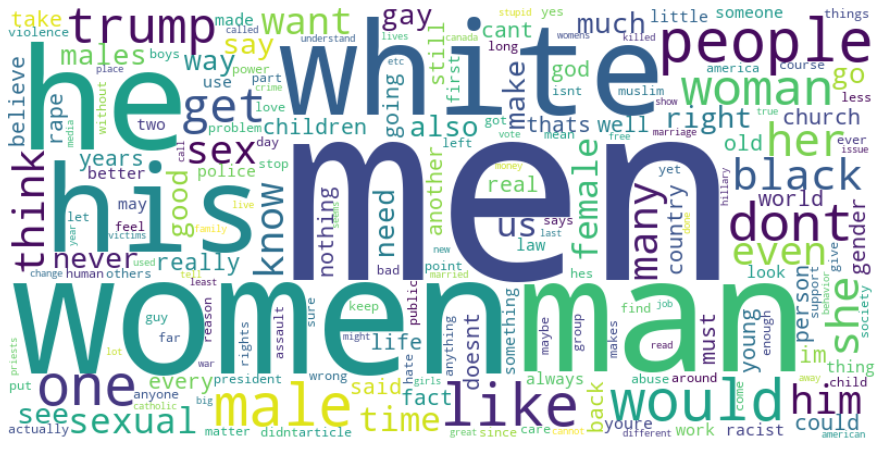

Most popular words in comments about women
{'women': 12306, 'woman': 4319, 'he': 4133, 'men': 4045, 'her': 3483, 'she': 3238, 'people': 2944, 'his': 2866, 'like': 2817, 'would': 2786, 'trump': 2482, 'one': 2400, 'dont': 2346, 'get': 1853, 'man': 1835, 'many': 1648, 'white': 1613, 'think': 1597, 'even': 1422, 'sexual': 1400, 'know': 1381, 'female': 1374, 'right': 1356, 'want': 1351, 'sex': 1290, 'him': 1204, 'see': 1196, 'us': 1194, 'time': 1175, 'male': 1171, 'make': 1130, 'say': 1102, 'also': 1069, 'way': 1066, 'never': 1037, 'children': 1000, 'much': 974, 'really': 967, 'could': 955, 'go': 953, 'good': 943, 'church': 935, 'years': 927, 'need': 913, 'im': 911, 'said': 910, 'well': 879, 'womens': 861, 'black': 832, 'life': 825, 'take': 791, 'rape': 790, 'cant': 778, 'world': 771, 'going': 769, 'every': 756, 'thats': 754, 'hillary': 751, 'rights': 744, 'nothing': 741, 'clinton': 728, 'believe': 710, 'person': 707, 'still': 697, 'doesnt': 694, 'country': 666, 'muslim': 660, 'president': 

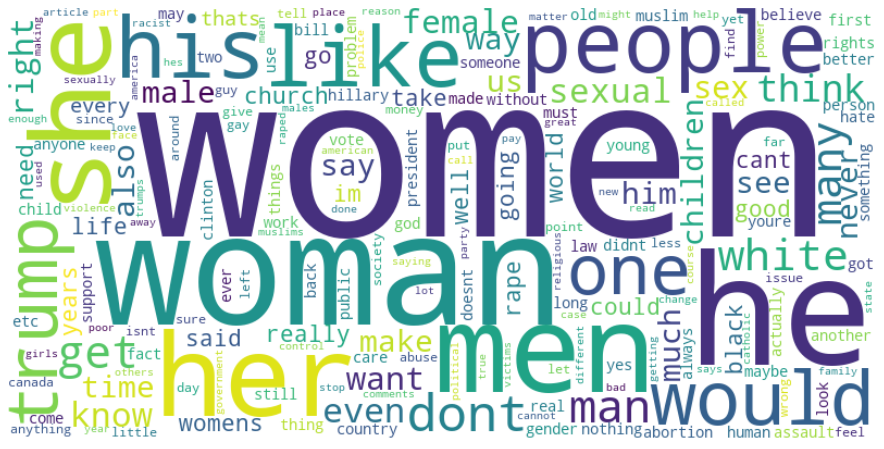

Most popular words in comments about black people
{'black': 7967, 'white': 3737, 'people': 3120, 'blacks': 2146, 'he': 2007, 'his': 1428, 'would': 1377, 'like': 1305, 'dont': 1198, 'racist': 1166, 'one': 1147, 'police': 1020, 'trump': 997, 'get': 867, 'racism': 829, 'many': 763, 'think': 761, 'whites': 760, 'man': 754, 'us': 746, 'race': 670, 'know': 666, 'even': 628, 'lives': 607, 'matter': 601, 'see': 597, 'right': 590, 'men': 582, 'time': 558, 'country': 547, 'say': 547, 'want': 543, 'she': 530, 'make': 525, 'obama': 516, 'person': 506, 'good': 498, 'her': 496, 'president': 495, 'way': 492, 'also': 490, 'never': 480, 'much': 479, 'him': 478, 'america': 476, 'im': 475, 'hate': 455, 'years': 453, 'thats': 437, 'well': 428, 'go': 428, 'women': 421, 'said': 421, 'folks': 417, 'really': 417, 'crime': 416, 'americans': 413, 'killed': 410, 'american': 405, 'could': 397, 'cops': 380, 'still': 379, 'fact': 378, 'every': 369, 'nothing': 368, 'back': 365, 'need': 352, 'racial': 352, 'didnt': 3

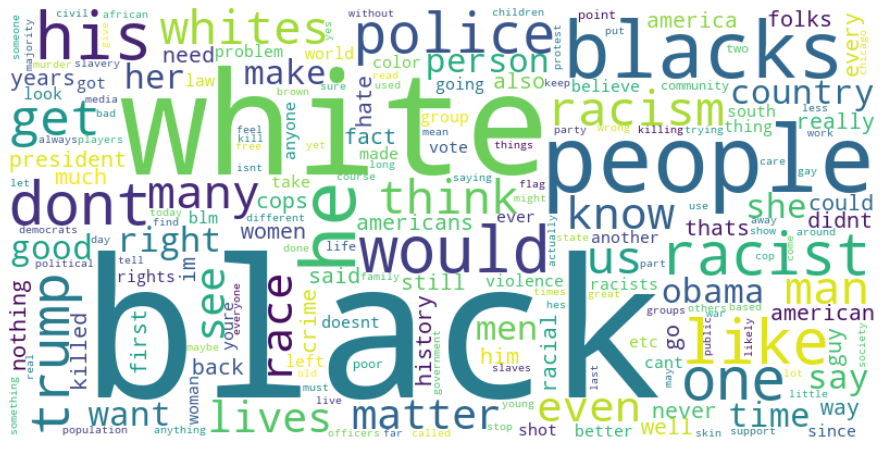

Most popular words in comments about white people
{'white': 14601, 'people': 4770, 'black': 3286, 'he': 2730, 'trump': 2322, 'like': 2077, 'his': 1968, 'racist': 1932, 'would': 1756, 'dont': 1745, 'one': 1601, 'racism': 1261, 'get': 1186, 'many': 1185, 'men': 1168, 'us': 1166, 'whites': 1106, 'supremacists': 1091, 'right': 1086, 'think': 1077, 'man': 1050, 'supremacist': 1010, 'know': 994, 'race': 961, 'country': 913, 'see': 880, 'even': 878, 'want': 870, 'hate': 848, 'blacks': 807, 'im': 804, 'america': 804, 'never': 800, 'much': 793, 'say': 787, 'also': 757, 'make': 751, 'time': 735, 'good': 728, 'way': 720, 'women': 696, 'him': 678, 'matter': 673, 'go': 666, 'she': 664, 'folks': 663, 'person': 640, 'well': 611, 'years': 610, 'said': 605, 'male': 600, 'thats': 591, 'american': 589, 'privilege': 580, 'racists': 563, 'police': 558, 'really': 557, 'president': 553, 'groups': 552, 'every': 547, 'need': 546, 'world': 545, 'her': 545, 'guy': 544, 'americans': 542, 'youre': 536, 'still': 53

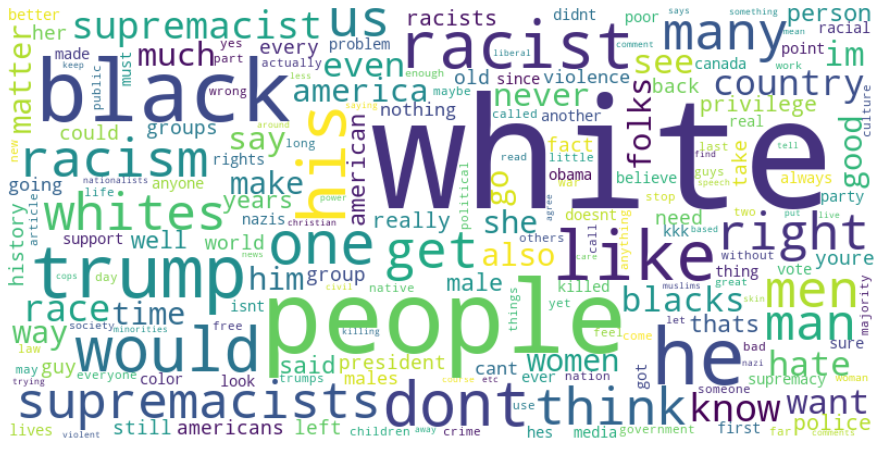

In [53]:
# get most popular relevant words in each group
from collections import Counter 
import string
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 50
rounded = all_comments.round({'white':1,'black':1,'female':1,'male':1})
rounded = rounded[rounded['toxicity_annotator_count']>=10]
rounded = rounded[(rounded.white >=0.8) | (rounded.black>=0.8) | (rounded.female>=0.8) | (rounded.male>=0.8)]

# removing punctuation
rounded['comment_text'] = rounded['comment_text'].str.translate(str.maketrans('', '', string.punctuation))
rounded['comment_text'] = rounded['comment_text'].replace('\n',' ', regex=True)
rounded['comment_text'] = rounded['comment_text'].str.lower()
display (rounded.head(10))

# keep gendered stopwords
stop = stopwords.words('english')
include = ['he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself']
for word in include:
    stop.remove(word)

print("Most popular words in comments about men")
men = rounded[rounded['male']>0.8]
split_it = men['comment_text'].str.split() 
words = split_it.to_list()
comment_words = [word for lst in words for word in lst]
filtered_words = [word for word in comment_words if not word in stop]
counter_var = Counter(filtered_words) 
most_occur = counter_var.most_common(250) 
freq = {}
for word in most_occur:
    freq[word[0]] = word[1]
print(freq)

wordcloud = WordCloud(width=800, height=400,stopwords = stop,background_color="white").generate_from_frequencies(freq)
plt.figure( figsize=(16,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("Most popular words in comments about women")
women = rounded[rounded['female']>0.8]
split_it = women['comment_text'].str.split() 
words = split_it.to_list()
comment_words = [word for lst in words for word in lst]
filtered_words = [word for word in comment_words if not word in stop]
counter_var = Counter(filtered_words) 
most_occur = counter_var.most_common(250) 
freq = {}
for word in most_occur:
    freq[word[0]] = word[1]
print(freq)

wordcloud = WordCloud(width=800, height=400,stopwords = stop,background_color="white").generate_from_frequencies(freq)
plt.figure( figsize=(16,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("Most popular words in comments about black people")
black = rounded[rounded['black']>0.8]
split_it = black['comment_text'].str.split() 
words = split_it.to_list()
comment_words = [word for lst in words for word in lst]
filtered_words = [word for word in comment_words if not word in stop]
counter_var = Counter(filtered_words) 
most_occur = counter_var.most_common(250) 
freq = {}
for word in most_occur:
    freq[word[0]] = word[1]
print(freq)

wordcloud = WordCloud(width=800, height=400,stopwords = stop,background_color="white").generate_from_frequencies(freq)
plt.figure( figsize=(16,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("Most popular words in comments about white people")
white = rounded[rounded['white']>0.8]
split_it = white['comment_text'].str.split() 
words = split_it.to_list()
comment_words = [word for lst in words for word in lst]
filtered_words = [word for word in comment_words if not word in stop]
counter_var = Counter(filtered_words) 
most_occur = counter_var.most_common(250) 
freq = {}
for word in most_occur:
    freq[word[0]] = word[1]
print(freq)

wordcloud = WordCloud(width=800, height=400,stopwords = stop,background_color="white").generate_from_frequencies(freq)
plt.figure( figsize=(16,8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()